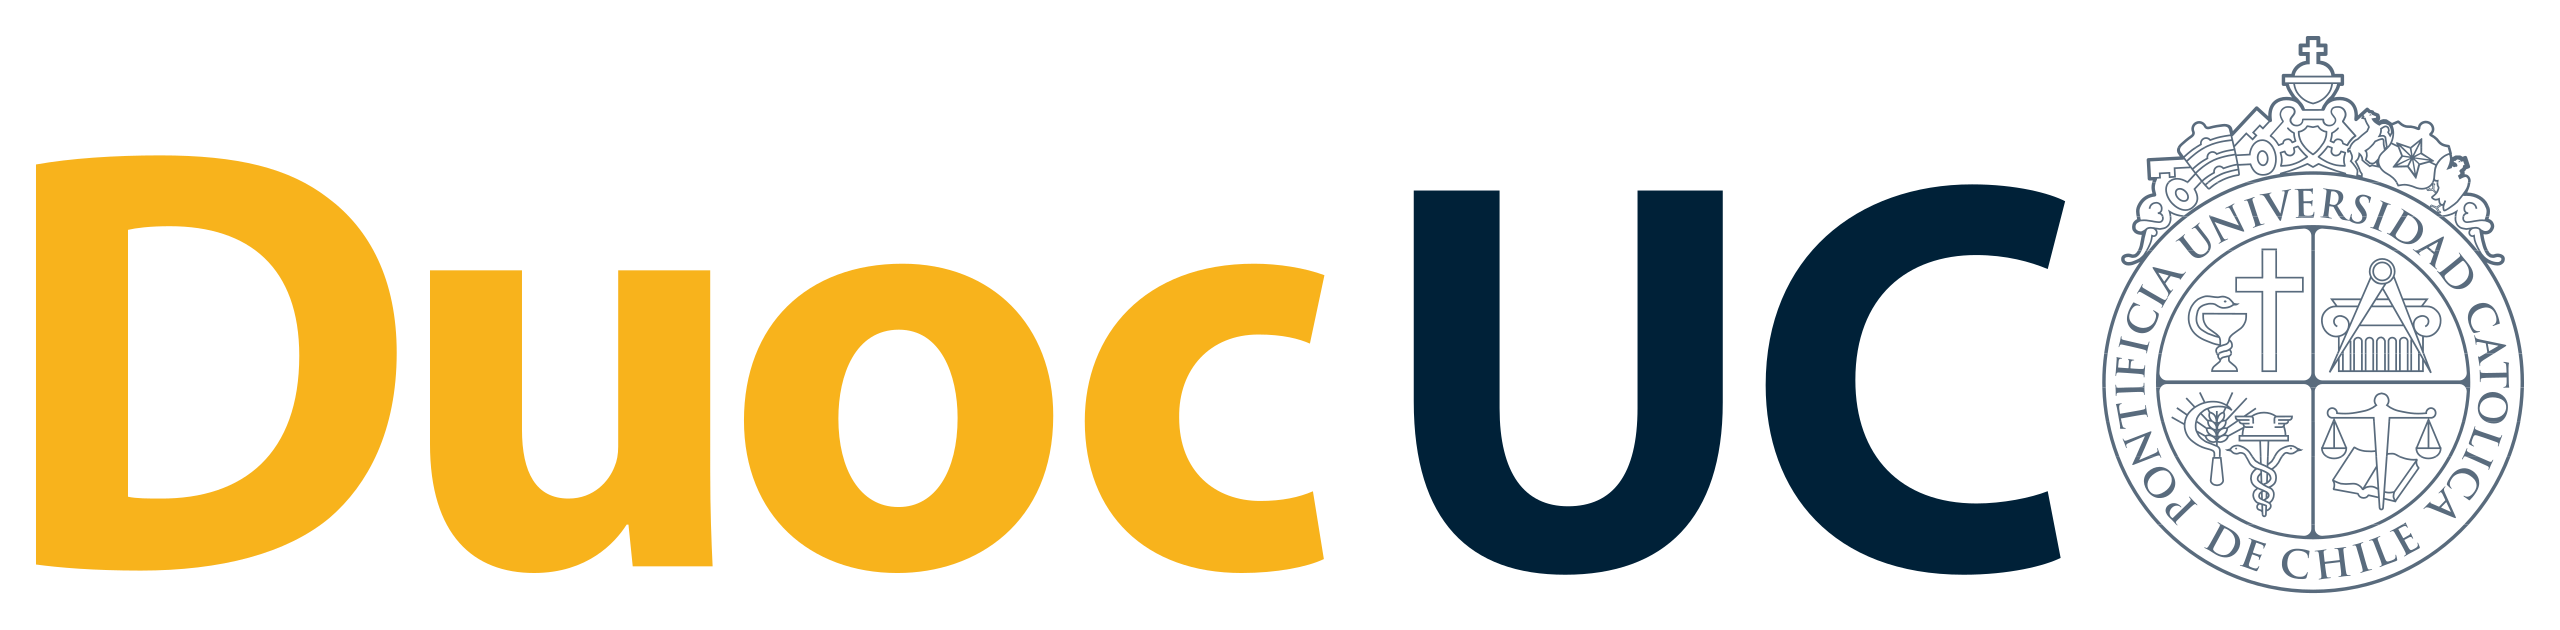

# Proyecto Monopoly

Integrantes:
* Pamela Aldana
* Manuel Diaz


Docente:  Carlos Correa   

Asignatura: Machine Learning (MLY0100)

Seccion: 003V

Sede: Melipilla

#**FASE 1 : COMPRENDER EL NEGOCIO**

##El caso "Banco Monopoly/Dormammu"

##**Analisis del proyecto**

La institucion bancaria Dormammu necesita conocer a los nuevos clientes obtenidos tras la adquisicion del banco Monopoly.
Por lo cual se implementara mediante la metodologia Crisp-DM de machine learning para darle solucion.
Se espera tener metricas aceptables en los modelos generados.
Disponemos de una base de datos con 12 meses de información.
En caso de riesgos asociados a los datos, se trabajara con estandares preventivos ISO/IEC 27001 y su extencion ISO/IEC 27018.
Una vez finalizado el proyecto Banco Dormammu espera entender el comportamiento de los clientes con el fin de preparar estrategias de negocio

##**Analisis del comportamiento de un cliente bancario**

Con este cambio de dueño se teme perder clientes, por ende se trabajara en primera instancia en la retencion de los clientes. En segunda instancia se trabajara en la adquisicion de nuevos clientes, para aquello necesitamos conocerlos:

**Personalidad del cliente:**

- Edad, nos ayuda a suponer su grado de habilidad tecnologica entre otras cosas
- Genero, se podria estudiar sus preferencias, sumandole la edad podemos determinar en que posible etapa de vida este (planificando hijos, retirandose, etc)
- Domicilio, saber su zona de residencia podria ayudar a entender su estilo de vida o gastos asociados a la zona geografica (escuelas o centros comerciales de la zona, clinicas etc)
- Profesion, esto ayuda a darnos una idea de su posible estilo de vida y/o intereses, sumandole la edad se podria determinar su evolucion de ingresos proyectados a futuro

**Comportamiento financiero:**

* Ingresos, saber cuanto gasta, invierte, ahorra nos da su perfil economico para futuras evaluaciones
* Historial de transacciones, estudiar los gastos, compras o pagos de servicio es fundamental para conocer sus intereses
* Historial de creditos, nos podria reflejar su madurez financiera
* Perfil de pagos, saber el comportamiento de pago nos dira su nivel de responsabilidad

Dicho esto ahora nos damos paso a entender la informacion que nos facilito el banco para estudiarla y ver con que nos encontraremos

In [ ]:
# Estructura y manipulación de datos
import pandas as pd  # Manipulación de datos estructurados (DataFrames)
import numpy as np  # Operaciones matemáticas y programación vectorial
from numpy import array  # Trabajo con arrays

# Visualización y gráficos
import seaborn as sns  # Gráficos estadísticos avanzados
from seaborn import boxplot  # Gráfico de caja para análisis de datos
import matplotlib.pyplot as plt  # Gráficos básicos en Python
from matplotlib import style  # Estilos para gráficos de Matplotlib

# Configuración de Matplotlib
plt.rcParams['image.cmap'] = "bwr"  # Configuración del mapa de color para imágenes
plt.rcParams['savefig.bbox'] = "tight"  # Ajustar automáticamente la caja de gráficos
style.use('ggplot')  # Estilo ggplot para gráficos

# Conexión y carga de archivos en Google Colab
from google.colab import files  # Subir y descargar archivos
from google.colab import drive  # Conectar Google Drive

# Estadística y análisis
from scipy.stats import pearsonr  # Correlación de Pearson
from scipy.stats import kurtosis, skew  # Cálculo de curtosis y asimetría
from scipy import stats  # Conjunto amplio de funciones estadísticas

# Preprocesamiento y modelado (Regresión y clasificación)
from sklearn.linear_model import LinearRegression, Ridge  # Modelos lineales (Regresión)
from sklearn.model_selection import train_test_split  # División del conjunto de datos
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para regresión
from sklearn.decomposition import PCA  # Análisis de Componentes Principales (reducción de dimensionalidad)

# Clasificación y algoritmos avanzados
from sklearn.svm import SVC  # Clasificador de Máquinas de Soporte Vectorial (SVM)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Bosques Aleatorios (Clasificación y Regresión)
from sklearn.neighbors import KNeighborsClassifier  # Clasificación K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  # Clasificadores Naive Bayes
from imblearn.over_sampling import SMOTE  # Manejo de datos desbalanceados con sobremuestreo

# Métricas y evaluación
from sklearn.metrics import (
    classification_report,  # Informe de clasificación
    confusion_matrix,  # Matriz de confusión
    accuracy_score,  # Métrica de precisión
    roc_curve, auc  # Curva ROC y área bajo la curva (AUC)
)

# Preprocesamiento adicional
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Escalado de datos
from sklearn.impute import KNNImputer  # Imputación de valores faltantes usando KNN

# Validación cruzada y optimización
from sklearn.model_selection import cross_val_score, GridSearchCV  # Validación cruzada y búsqueda de hiperparámetros

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')  # Suprimir advertencias


In [ ]:
drive.mount('/content/drive')

#rt ="/content/drive/MyDrive/Base_clientes_Monopoly THIS.xlsx"
rt="/content/drive/MyDrive/Base_clientes_Monopoly-0.xlsx"# poner la ruta de tu monopoli.xlsx que tienes en tu drive

df = pd.read_excel(rt)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Id  Subsegmento Sexo  Region  Edad     Renta  Antiguedad  Internauta  \
0   1          160    M    13.0    43       NaN         130           1   
1   2          160    H    13.0    46  143640.0          69           1   
2   3          170    H    13.0    45  929106.0          24           1   
3   4          151    H    13.0    46  172447.0         134           0   
4   5          170    H    13.0    46  805250.0         116           0   

   Adicional  Dualidad  ...  ColMx_T01  PagoNac_T01  PagoInt_T01  EeccNac_T01  \
0          1         0  ...        0.0        33000          0.0    1099866.0   
1          0         0  ...        0.0       300000          0.0     214592.0   
2          1         0  ...        0.0       216676          0.0          0.0   
3          1         0  ...        0.0        60000          0.0     272762.0   
4          1         1  ...        0.0       272925          0.0     249562.0   

   EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  target  
0          0.0  1099866.0      15080        0.0           R       0  
1          0.0   214592.0      83596        0.0           R       0  
2          0.0     7400.0          0        0.0           T       0  
3          0.0   272762.0      10591        0.0           R       0  
4          0.0    75339.0     377782        0.0           R       0  

[5 rows x 574 columns]

# **FASE 3 : PREPARAR LOS DATOS**


In [ ]:
df_discriminado= df[['Sexo','Antiguedad', 'Edad','Renta', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2', 'ColL1TE_T12', 'ColL1TE_T11', 'ColL1TE_T10', 'ColL1TE_T09',
                      'ColL1TE_T08', 'ColL1TE_T07', 'ColL1TE_T06', 'ColL1TE_T05', 'ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02',
                      'ColL1TE_T01', 'EeccNac_T12','EeccNac_T11', 'EeccNac_T10', 'EeccNac_T09', 'EeccNac_T08', 'EeccNac_T07', 'EeccNac_T06', 'EeccNac_T05',
                      'EeccNac_T04', 'EeccNac_T03', 'EeccNac_T02', 'EeccNac_T01', 'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09',
                      'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05', 'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02',
                      'PagoNac_T01','target']].copy()

In [ ]:
df.shape

(51124, 574)

In [ ]:
df_discriminado.shape

(51124, 44)

In [ ]:
df2=df_discriminado.copy()

In [ ]:
df_discriminado=df2.copy()

## **Valores Nulos**

In [ ]:
df_discriminado.shape

(51124, 44)

In [ ]:
# Imputar valores nulos en 'EeccNac_T07' a 0
df_discriminado['EeccNac_T07'].fillna(0, inplace=True)

df_discriminado[['EeccNac_T07']].isnull().sum()

EeccNac_T07    0
dtype: int64

In [ ]:
renta_mediana = df_discriminado['Renta'].median()
df_discriminado['Renta'].fillna(renta_mediana, inplace=True)


In [ ]:
df_discriminado[['EeccNac_T07', 'Renta']].isnull().sum()


EeccNac_T07    0
Renta          0
dtype: int64

In [ ]:
df_discriminado.dropna(inplace=True)

In [ ]:
df_discriminado.isna().sum().sum()

0

In [ ]:
df_discriminado.shape

(42422, 44)

In [ ]:
df2=df_discriminado.copy()

In [ ]:
df_discriminado_out=df_discriminado.copy()

### **Transformacion Logaritmica**

---



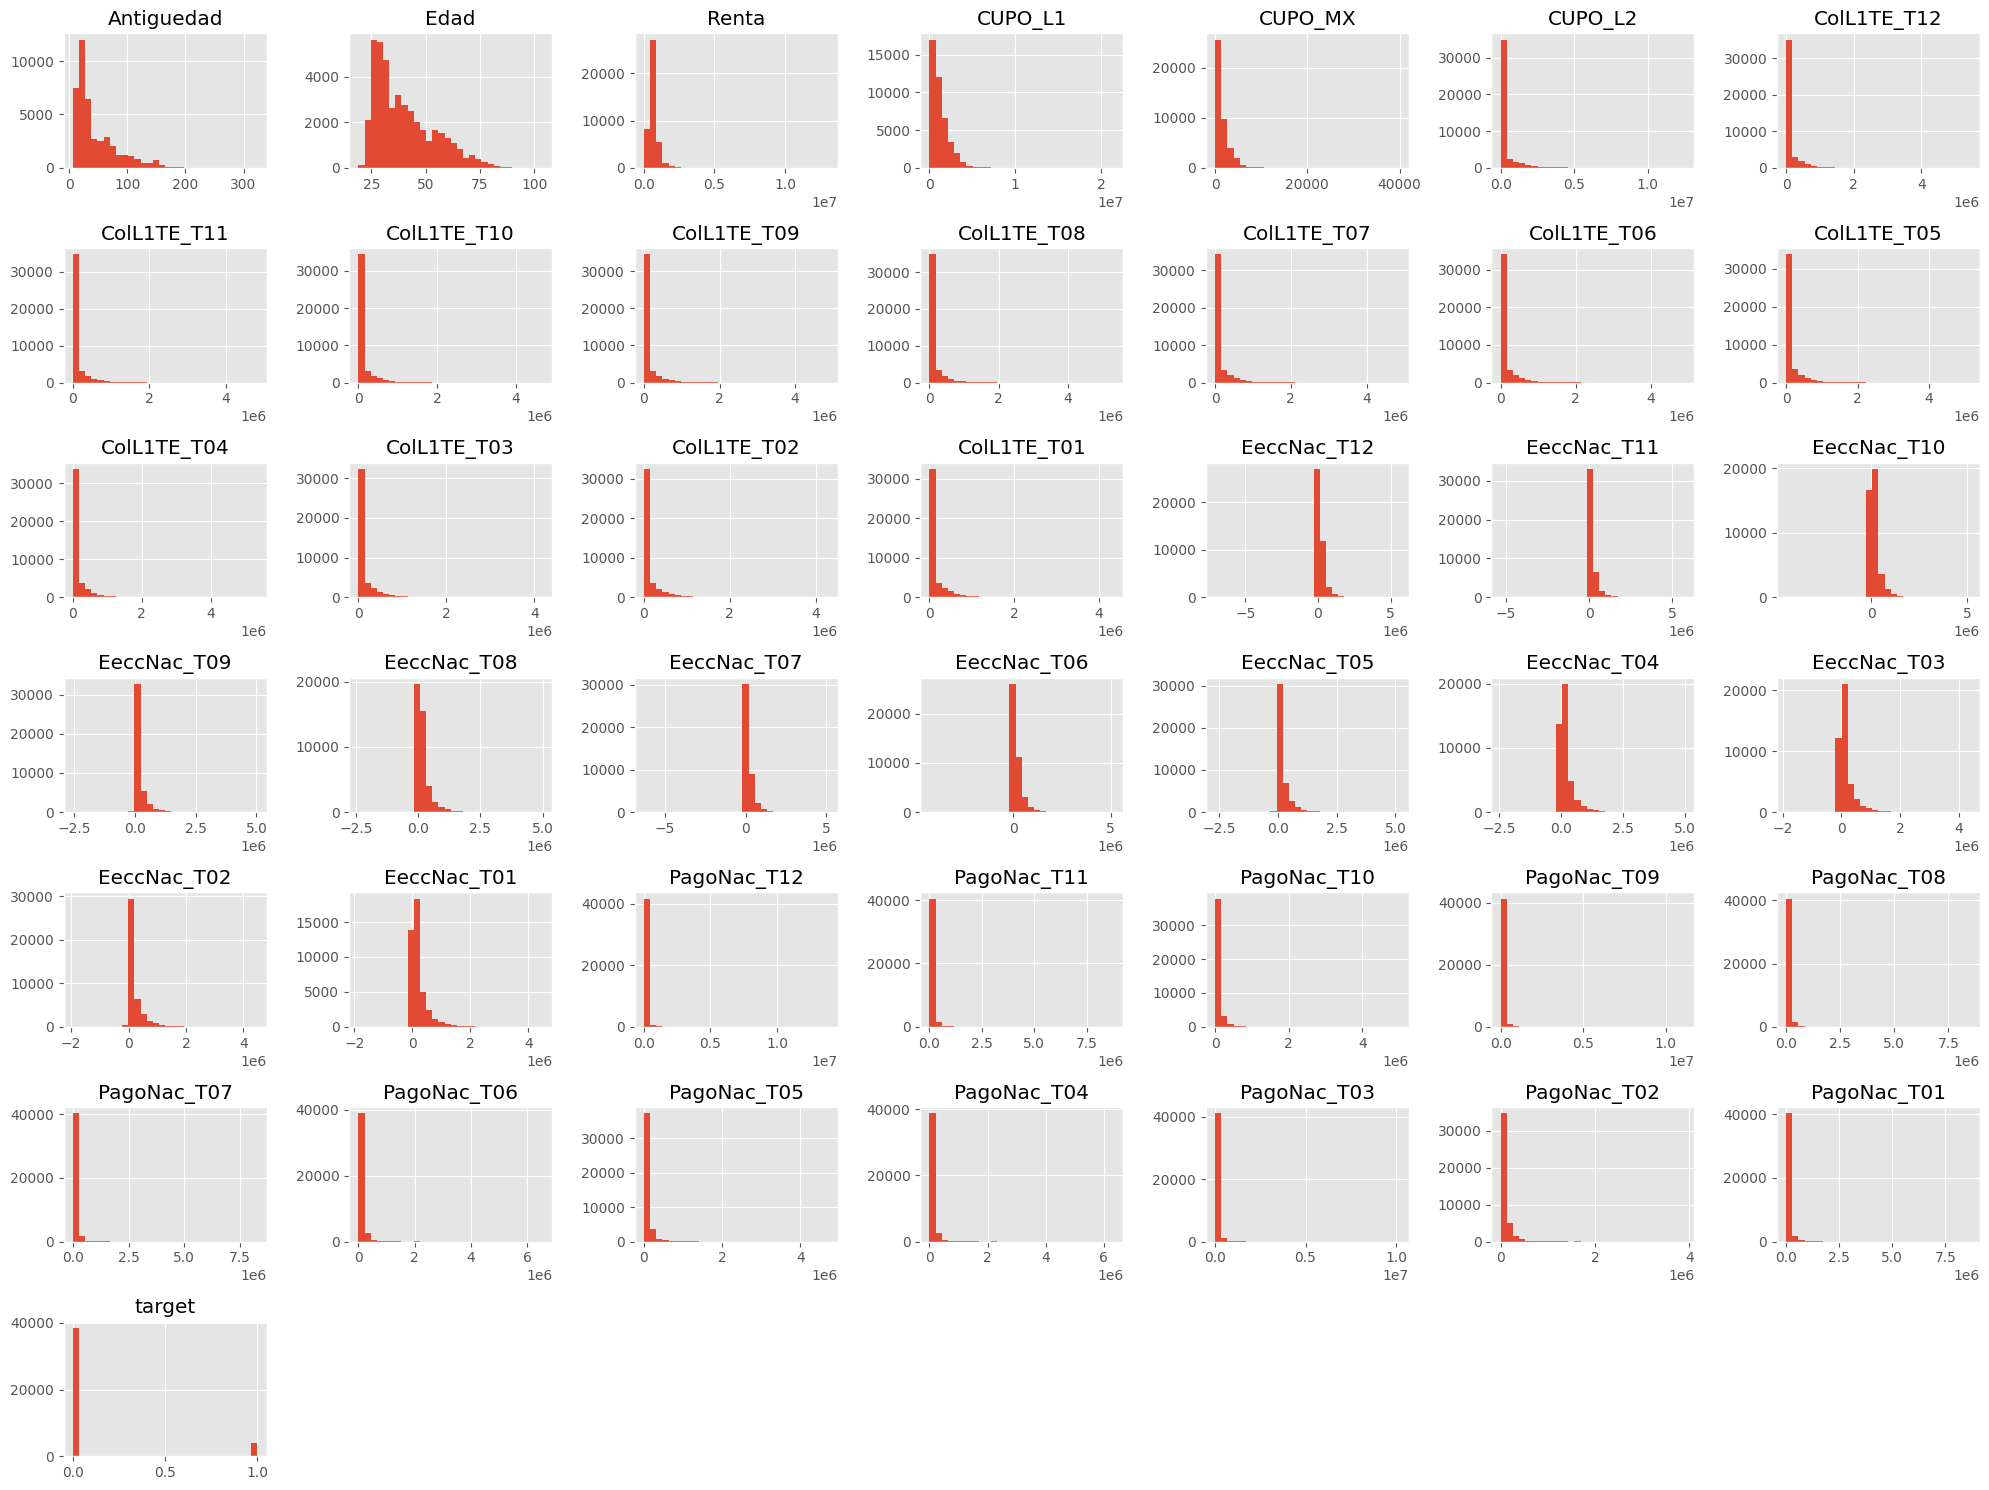

In [ ]:
df_discriminado.hist(bins=30, figsize=(20, 15))
plt.tight_layout()  # Ajusta el espacio entre gráficos
plt.show()

Se aplica antes de tratar los outliers.Para ayudar a reducir la asimetría, comprimir los valores extremos y hacer que la detección de outliers sea más efectiva.

In [ ]:
# Identificar todas las columnas numéricas en el DataFrame
columnas_numericas = df_discriminado.select_dtypes(include=['float64', 'int64']).columns

# Filtrar las variables binarias para que no se transformen
columnas_no_binarias = columnas_numericas.difference(['Sexo_M', 'target'])  # Excluyendo Sexo y Target si son binarias

# Aplicar la suma constante y transformación logarítmica solo a las columnas numéricas no binarias
for columna in columnas_no_binarias:
    # Encontrar el valor mínimo de la columna
    min_val = df_discriminado[columna].min()

    # Si la columna tiene valores negativos, sumar una constante para hacer todos los valores positivos
    if min_val < 0:
        suma_constante = abs(min_val) + 1  # Sumar el valor absoluto del mínimo + 1
        df_discriminado[columna] = df_discriminado[columna] + suma_constante  # Aplicar la suma constante

    # Aplicar la transformación logarítmica a la columna
    df_discriminado[columna] = np.log1p(df_discriminado[columna])  # log(x+1)

# Mostrar las primeras filas del DataFrame transformado
df_discriminado.describe()


Antiguedad          Edad         Renta       CUPO_L1       CUPO_MX  \
count  42422.000000  42422.000000  42422.000000  42422.000000  42422.000000   
mean       3.562453      3.659636     13.227092     13.610253      6.481507   
std        0.698342      0.313396      0.885555      0.989824      1.927048   
min        1.945910      2.995732      0.693147      0.000000      0.000000   
25%        2.995732      3.401197     13.080838     13.035718      5.993961   
50%        3.433987      3.610918     13.248138     13.769468      6.908755   
75%        4.127134      3.912023     13.498727     14.335495      7.601402   
max        5.783825      4.653960     16.387308     16.885144     10.596660   

            CUPO_L2   ColL1TE_T12   ColL1TE_T11   ColL1TE_T10   ColL1TE_T09  \
count  42422.000000  42422.000000  42422.000000  42422.000000  42422.000000   
mean       9.243327      4.705726      4.824822      5.023537      5.055661   
std        4.863077      5.618540      5.635357      5.645120      5.653621   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.908755      0.000000      0.000000      0.000000      0.000000   
50%       11.512935      0.000000      0.000000      0.000000      0.000000   
75%       12.429220     11.194368     11.225840     11.317461     11.336433   
max       16.345231     15.513311     15.388881     15.359039     15.401595   

       ...   PagoNac_T09   PagoNac_T08   PagoNac_T07   PagoNac_T06  \
count  ...  42422.000000  42422.000000  42422.000000  42422.000000   
mean   ...      8.359808      8.381074      8.265812      8.506250   
std    ...      4.603296      4.583375      4.689912      4.589616   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      8.517393      8.517393      8.517393      8.517393   
50%    ...     10.348301     10.349759     10.370925     10.500427   
75%    ...     11.379805     11.391359     11.407576     11.505102   
max    ...     16.230286     15.959141     15.930413     15.695206   

        PagoNac_T05   PagoNac_T04   PagoNac_T03   PagoNac_T02   PagoNac_T01  \
count  42422.000000  42422.000000  42422.000000  42422.000000  42422.000000   
mean       8.105968      8.884756      8.313061      8.831172      8.570789   
std        4.778906      4.281517      4.641721      4.355943      4.526279   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.811128      8.987322      8.517393      8.954609      8.517393   
50%       10.308986     10.563569     10.371066     10.596660     10.490315   
75%       11.391788     11.512935     11.394108     11.512935     11.493730   
max       15.366679     15.666072     16.137898     15.179560     15.978579   

             target  
count  42422.000000  
mean       0.094691  
std        0.292792  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 43 columns]

Se asegura que todas las variables numéricas, independientemente de si contienen valores negativos o positivos, sean transformadas adecuadamente con la suma constante y la transformación logarítmica. Para ajustar las variables a distribuciones normales o en la reducción de la asimetría.

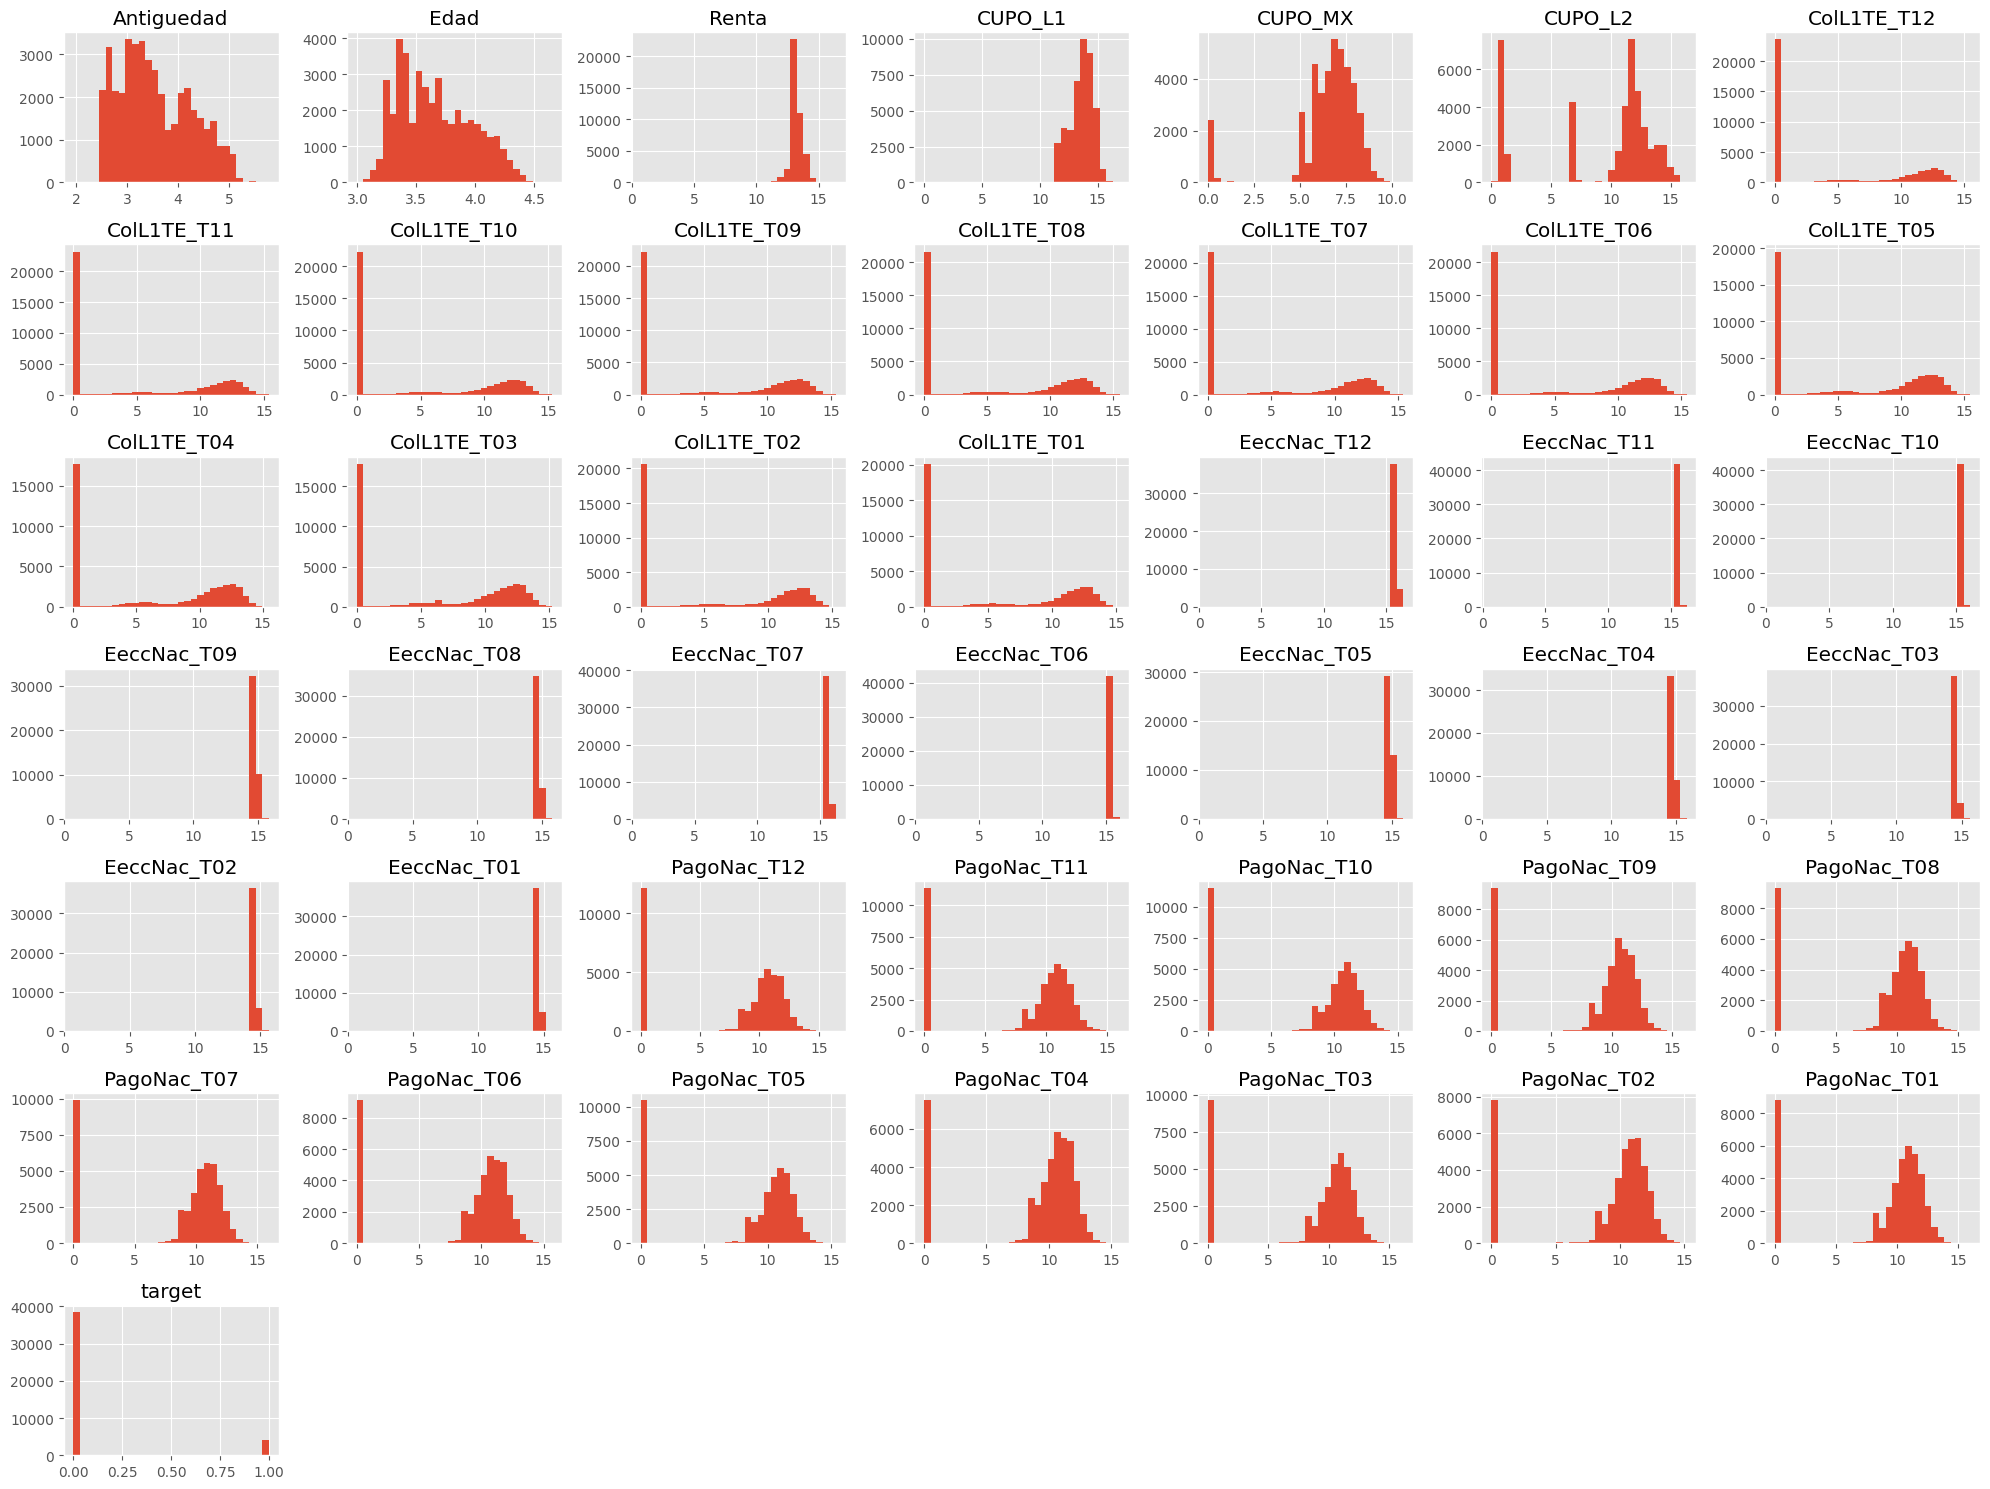

In [ ]:
df_discriminado.hist(bins=30, figsize=(20, 15))
plt.tight_layout()  # Ajusta el espacio entre gráficos
plt.show()

In [ ]:
df_discriminado.describe().T

count       mean       std       min        25%        50%  \
Antiguedad   42422.0   3.562453  0.698342  1.945910   2.995732   3.433987   
Edad         42422.0   3.659636  0.313396  2.995732   3.401197   3.610918   
Renta        42422.0  13.227092  0.885555  0.693147  13.080838  13.248138   
CUPO_L1      42422.0  13.610253  0.989824  0.000000  13.035718  13.769468   
CUPO_MX      42422.0   6.481507  1.927048  0.000000   5.993961   6.908755   
CUPO_L2      42422.0   9.243327  4.863077  0.000000   6.908755  11.512935   
ColL1TE_T12  42422.0   4.705726  5.618540  0.000000   0.000000   0.000000   
ColL1TE_T11  42422.0   4.824822  5.635357  0.000000   0.000000   0.000000   
ColL1TE_T10  42422.0   5.023537  5.645120  0.000000   0.000000   0.000000   
ColL1TE_T09  42422.0   5.055661  5.653621  0.000000   0.000000   0.000000   
ColL1TE_T08  42422.0   5.190079  5.656879  0.000000   0.000000   0.000000   
ColL1TE_T07  42422.0   5.167226  5.658037  0.000000   0.000000   0.000000   
ColL1TE_T06  42422.0   5.273352  5.708382  0.000000   0.000000   0.000000   
ColL1TE_T05  42422.0   5.731769  5.695556  0.000000   0.000000   4.948760   
ColL1TE_T04  42422.0   6.110133  5.622028  0.000000   0.000000   6.535241   
ColL1TE_T03  42422.0   6.109038  5.634806  0.000000   0.000000   6.502790   
ColL1TE_T02  42422.0   5.501516  5.752524  0.000000   0.000000   3.218876   
ColL1TE_T01  42422.0   5.601398  5.743927  0.000000   0.000000   4.127134   
EeccNac_T12  42422.0  15.797300  0.083128  0.693147  15.775804  15.783032   
EeccNac_T11  42422.0  15.519009  0.087626  0.693147  15.491510  15.501138   
EeccNac_T10  42422.0  15.346223  0.092256  0.693147  15.314216  15.325574   
EeccNac_T09  42422.0  14.812964  0.116583  0.693147  14.759720  14.779710   
EeccNac_T08  42422.0  14.761722  0.117941  0.693147  14.705617  14.726795   
EeccNac_T07  42422.0  15.686290  0.084033  0.693147  15.663007  15.671699   
EeccNac_T06  42422.0  15.312225  0.092705  0.693147  15.278059  15.291179   
EeccNac_T05  42422.0  14.864374  0.113086  0.693147  14.810853  14.832147   
EeccNac_T04  42422.0  14.779043  0.119619  0.693147  14.720028  14.743411   
EeccNac_T03  42422.0  14.523145  0.132285  0.693147  14.451648  14.479500   
EeccNac_T02  42422.0  14.569203  0.141809  0.693147  14.495064  14.525806   
EeccNac_T01  42422.0  14.531459  0.141503  0.693147  14.453791  14.486337   
PagoNac_T12  42422.0   7.691808  4.987825  0.000000   0.000000  10.182671   
PagoNac_T11  42422.0   7.882409  4.901946  0.000000   0.000000  10.261144   
PagoNac_T10  42422.0   7.829018  4.905682  0.000000   0.000000  10.247698   
PagoNac_T09  42422.0   8.359808  4.603296  0.000000   8.517393  10.348301   
PagoNac_T08  42422.0   8.381074  4.583375  0.000000   8.517393  10.349759   
PagoNac_T07  42422.0   8.265812  4.689912  0.000000   8.517393  10.370925   
PagoNac_T06  42422.0   8.506250  4.589616  0.000000   8.517393  10.500427   
PagoNac_T05  42422.0   8.105968  4.778906  0.000000   5.811128  10.308986   
PagoNac_T04  42422.0   8.884756  4.281517  0.000000   8.987322  10.563569   
PagoNac_T03  42422.0   8.313061  4.641721  0.000000   8.517393  10.371066   
PagoNac_T02  42422.0   8.831172  4.355943  0.000000   8.954609  10.596660   
PagoNac_T01  42422.0   8.570789  4.526279  0.000000   8.517393  10.490315   
target       42422.0   0.094691  0.292792  0.000000   0.000000   0.000000   

                   75%        max  
Antiguedad    4.127134   5.783825  
Edad          3.912023   4.653960  
Renta        13.498727  16.387308  
CUPO_L1      14.335495  16.885144  
CUPO_MX       7.601402  10.596660  
CUPO_L2      12.429220  16.345231  
ColL1TE_T12  11.194368  15.513311  
ColL1TE_T11  11.225840  15.388881  
ColL1TE_T10  11.317461  15.359039  
ColL1TE_T09  11.336433  15.401595  
ColL1TE_T08  11.415660  15.490607  
ColL1TE_T07  11.413158  15.398729  
ColL1TE_T06  11.505430  15.407461  
ColL1TE_T05  11.644335  15.458313  
ColL1TE_T04  11.699459  15.493399  
ColL1TE_T03  11.740190  15.250738  
ColL1TE_T02  1

In [ ]:
df_discriminado.columns

Index(['Sexo', 'Antiguedad', 'Edad', 'Renta', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2',
       'ColL1TE_T12', 'ColL1TE_T11', 'ColL1TE_T10', 'ColL1TE_T09',
       'ColL1TE_T08', 'ColL1TE_T07', 'ColL1TE_T06', 'ColL1TE_T05',
       'ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T01',
       'EeccNac_T12', 'EeccNac_T11', 'EeccNac_T10', 'EeccNac_T09',
       'EeccNac_T08', 'EeccNac_T07', 'EeccNac_T06', 'EeccNac_T05',
       'EeccNac_T04', 'EeccNac_T03', 'EeccNac_T02', 'EeccNac_T01',
       'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09',
       'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05',
       'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01', 'target'],
      dtype='object')

Distribucion Normal

* Antiguedad: Media = 3.56, Mediana = 3.43 . Bastante similar, indica que tiende a  una distribución normal.
* Edad: Media = 3.66, Mediana = 3.61 . Similar, lo que también indica una distribución normal aproximada.
* Renta: Media = 13.23, Mediana = 13.25. Similar, tambien tiende a distribucion normal
* Cupo_L1 = 13.610253, Mediana = 13.769468

In [ ]:
df_discriminado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42422 entries, 0 to 51123
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Antiguedad   42422 non-null  float64
 1   Edad         42422 non-null  float64
 2   Renta        42422 non-null  float64
 3   CUPO_L1      42422 non-null  float64
 4   CUPO_MX      42422 non-null  float64
 5   CUPO_L2      42422 non-null  float64
 6   ColL1TE_T12  42422 non-null  float64
 7   ColL1TE_T11  42422 non-null  float64
 8   ColL1TE_T10  42422 non-null  float64
 9   ColL1TE_T09  42422 non-null  float64
 10  ColL1TE_T08  42422 non-null  float64
 11  ColL1TE_T07  42422 non-null  float64
 12  ColL1TE_T06  42422 non-null  float64
 13  ColL1TE_T05  42422 non-null  float64
 14  ColL1TE_T04  42422 non-null  float64
 15  ColL1TE_T03  42422 non-null  float64
 16  ColL1TE_T02  42422 non-null  float64
 17  ColL1TE_T01  42422 non-null  float64
 18  EeccNac_T12  42422 non-null  float64
 19  EeccNac_T

In [ ]:
df_discriminado.isna().sum().sum()

0

## **Transformacion de variables**


In [ ]:
print(df_discriminado_out['Sexo'].dtype)
print(df_discriminado_out['Sexo'].unique())


object
['M' 'H']


In [ ]:
df_categ = df_discriminado_out.select_dtypes(include=['object', 'category'])

# Ver los primeros registros de las variables categóricas
df_categ.columns

Index(['Sexo'], dtype='object')

Para manejar y transformar variables categóricas en variables numéricas utilizando técnicas como one-hot encoding o label encoding.Para la Vriable Sexo que la utilizaremos en los modelos.





In [ ]:
# Realizar One-Hot Encoding en la columna 'Sexo'
df_discriminado_out = pd.get_dummies(df_discriminado_out, columns=['Sexo'], drop_first=True)
df_discriminado_out['Sexo_M'] = df_discriminado_out['Sexo_M'].astype(int)



In [ ]:
df_discriminado_out['Sexo_M'].info()

<class 'pandas.core.series.Series'>
Index: 42422 entries, 0 to 51123
Series name: Sexo_M
Non-Null Count  Dtype
--------------  -----
42422 non-null  int64
dtypes: int64(1)
memory usage: 662.8 KB


In [ ]:
df_discriminado_out['Sexo_M'].isnull().sum()

0

###**OUTLIERS**

In [ ]:
def tratar_outliers_iqr(df_discriminado_out, columna):
    # Calcular los cuartiles
    Q1 = df_discriminado_out[columna].quantile(0.25)
    Q3 = df_discriminado_out[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Reemplazar los valores fuera de los límites por los valores límite
    df_discriminado_out[columna] = np.where(df_discriminado_out[columna] < limite_inferior, limite_inferior, df_discriminado_out[columna])
    df_discriminado_out[columna] = np.where(df_discriminado_out[columna] > limite_superior, limite_superior, df_discriminado_out[columna])

    return df_discriminado_out


In [ ]:
columnas_a_tratar = ['Antiguedad', 'Edad', 'Renta', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2',
       'ColL1TE_T12', 'ColL1TE_T11', 'ColL1TE_T10', 'ColL1TE_T09',
       'ColL1TE_T08', 'ColL1TE_T07', 'ColL1TE_T06', 'ColL1TE_T05',
       'ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T01',
       'EeccNac_T12', 'EeccNac_T11', 'EeccNac_T10', 'EeccNac_T09',
       'EeccNac_T08', 'EeccNac_T07', 'EeccNac_T06', 'EeccNac_T05',
       'EeccNac_T04', 'EeccNac_T03', 'EeccNac_T02', 'EeccNac_T01',
       'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09',
       'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05',
       'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01', 'target','Sexo_M'
       ]

for columna in columnas_a_tratar:
    df_discriminado_out = tratar_outliers_iqr(df_discriminado_out, columna)


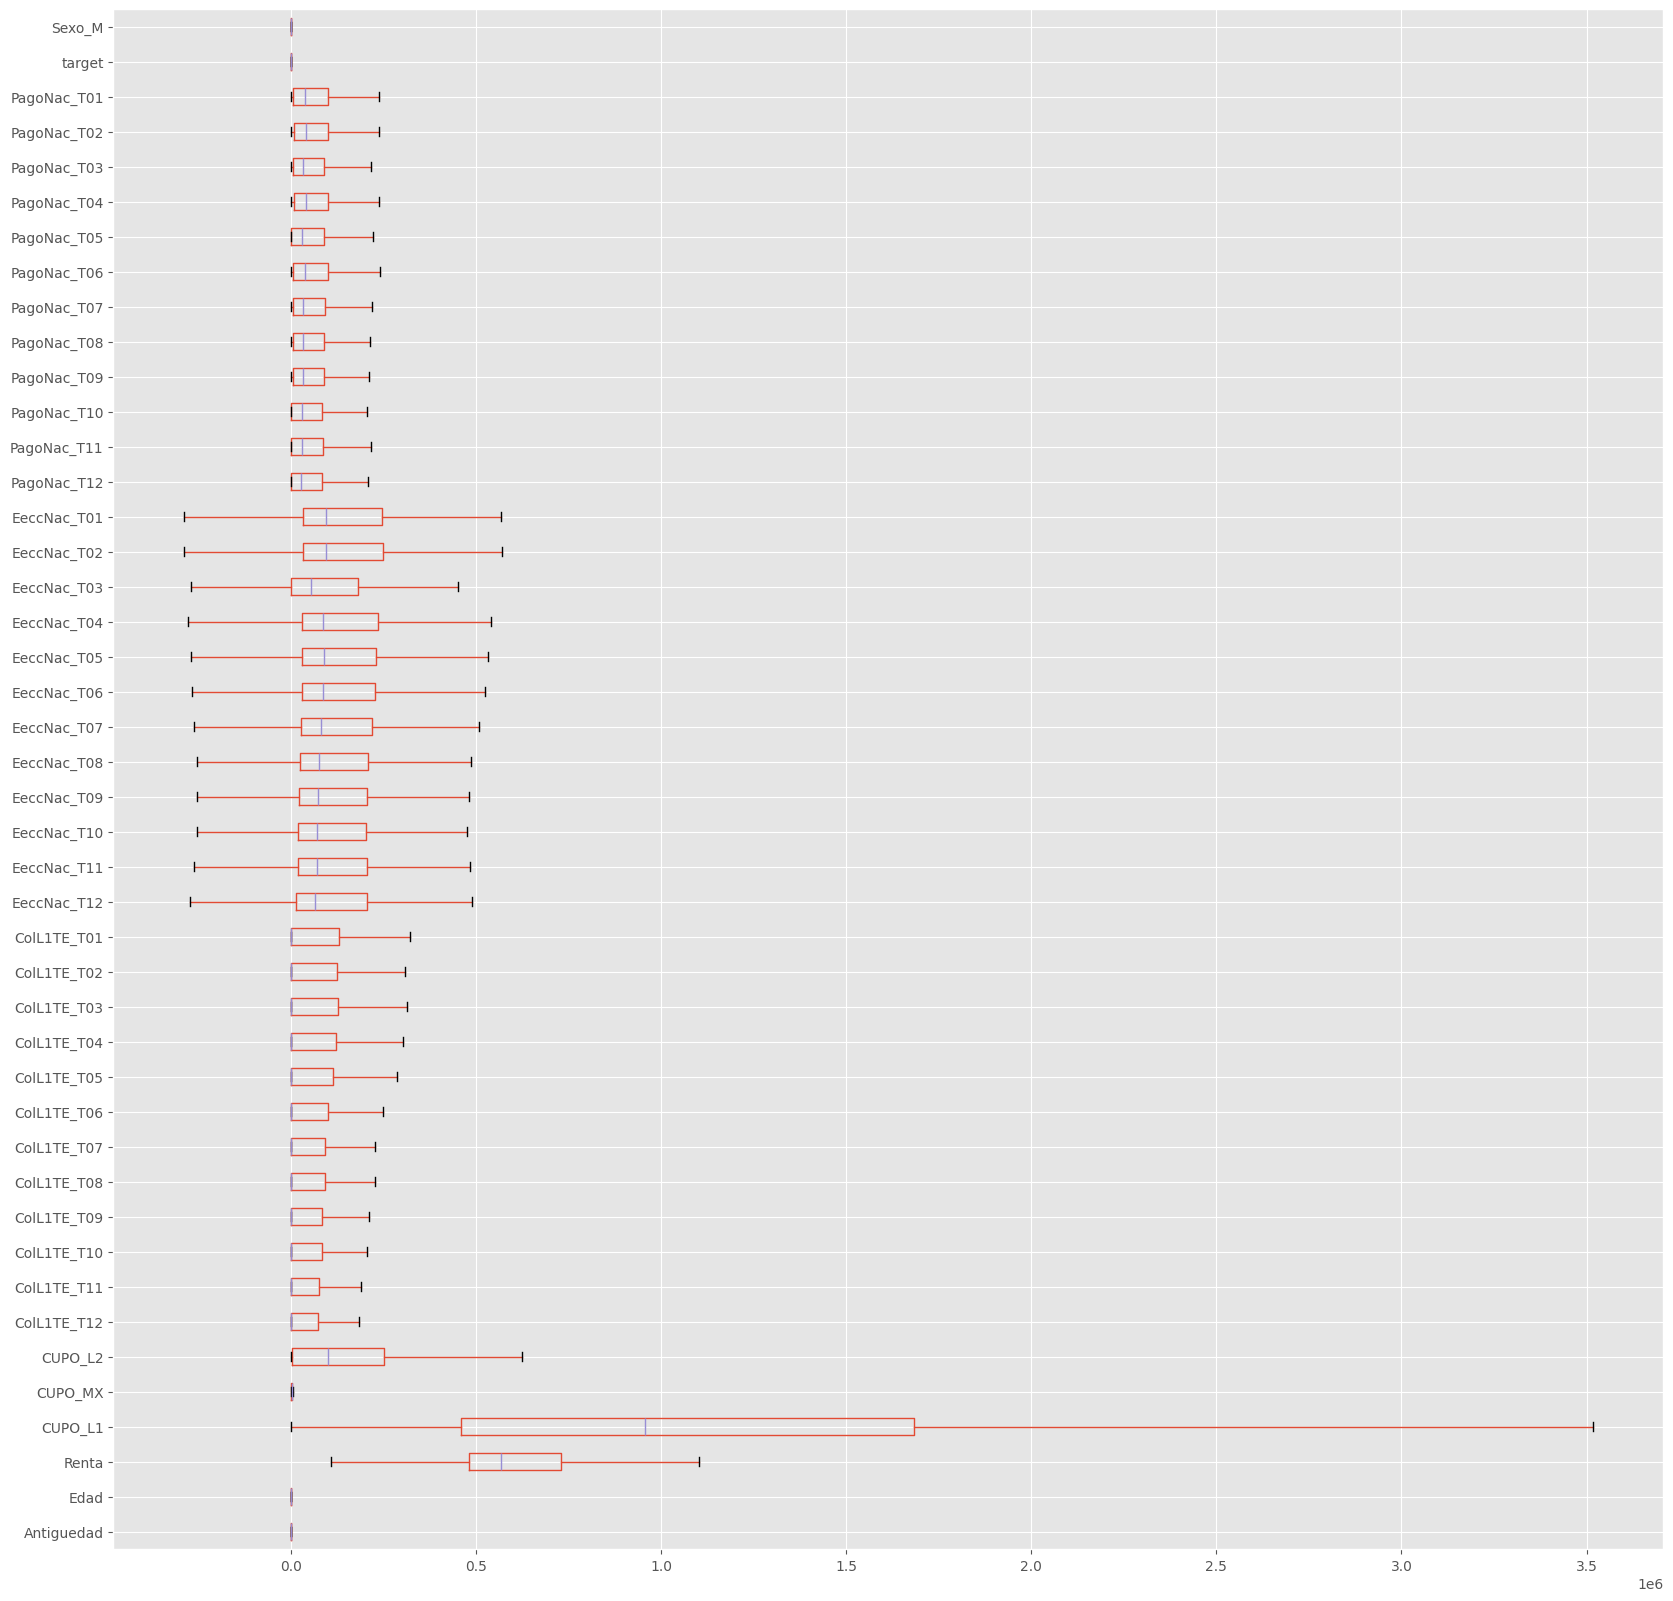

In [ ]:
plt.figure(figsize=(20,20))
df_discriminado_out.boxplot(column=['Antiguedad', 'Edad', 'Renta', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2',
       'ColL1TE_T12', 'ColL1TE_T11', 'ColL1TE_T10', 'ColL1TE_T09',
       'ColL1TE_T08', 'ColL1TE_T07', 'ColL1TE_T06', 'ColL1TE_T05',
       'ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T01',
       'EeccNac_T12', 'EeccNac_T11', 'EeccNac_T10', 'EeccNac_T09',
       'EeccNac_T08', 'EeccNac_T07', 'EeccNac_T06', 'EeccNac_T05',
       'EeccNac_T04', 'EeccNac_T03', 'EeccNac_T02', 'EeccNac_T01',
       'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09',
       'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05',
       'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01', 'target','Sexo_M'
       ], vert=False)
plt.show()

In [ ]:
df3=df_discriminado.copy()

In [ ]:
df_discriminado_out= df_discriminado.copy()

##**Escalado de características**


In [ ]:
# Seleccionar las columnas para estandarizar
#columns_to_standardize = []

# Seleccionar las columnas para normalizar
columns_to_normalize = ['Antiguedad', 'Edad', 'Renta', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2',
       'ColL1TE_T12', 'ColL1TE_T11', 'ColL1TE_T10', 'ColL1TE_T09',
       'ColL1TE_T08', 'ColL1TE_T07', 'ColL1TE_T06', 'ColL1TE_T05',
       'ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T01',
       'EeccNac_T12', 'EeccNac_T11', 'EeccNac_T10', 'EeccNac_T09',
       'EeccNac_T08', 'EeccNac_T07', 'EeccNac_T06', 'EeccNac_T05',
       'EeccNac_T04', 'EeccNac_T03', 'EeccNac_T02', 'EeccNac_T01',
       'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09',
       'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05',
       'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01', 'target',
       'Sexo_M']

# Inicializar los scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Estandarizar los datos
#df[columns_to_standardize] = standard_scaler.fit_transform(df[columns_to_standardize])

# Normalizar los datos
df_discriminado_out[columns_to_normalize] = minmax_scaler.fit_transform(df_discriminado_out[columns_to_normalize])

# Ver los primeros registros del DataFrame
df_discriminado_out.head(5)


Antiguedad      Edad     Renta   CUPO_L1   CUPO_MX   CUPO_L2  ColL1TE_T12  \
0    1.000000  0.400000  0.462763  0.226882  0.275000  1.000000     1.000000   
1    0.533898  0.450000  0.037393  0.213235  0.227273  0.240577     0.453825   
2    0.152542  0.433333  0.826565  0.383823  0.340909  0.320770     0.000000   
3    1.000000  0.450000  0.066336  0.446599  0.000000  0.352848     1.000000   
4    0.932203  0.450000  0.702125  0.785273  1.000000  0.000003     0.000000   
5    0.516949  0.466667  0.604078  0.373161  0.162273  0.721732     0.000000   
6    0.127119  0.483333  0.920734  0.231146  0.136364  0.256616     0.660512   
7    0.533898  0.450000  0.462763  0.353117  0.285227  1.000000     0.000000   
8    0.228814  0.500000  1.000000  0.567603  0.454545  0.000002     1.000000   
9    0.144068  0.416667  0.862013  0.191058  0.227273  1.000000     0.000000   

   ColL1TE_T11  ColL1TE_T10  ColL1TE_T09  ...  PagoNac_T08  PagoNac_T07  \
0     1.000000     1.000000     1.000000  ...     0.116888     0.119540   
1     0.506387     0.792931     1.000000  ...     0.841591     0.919540   
2     0.000000     0.000000     0.000000  ...     0.000000     0.279936   
3     1.000000     1.000000     1.000000  ...     0.280530     0.206897   
4     0.000000     0.000000     0.000000  ...     1.000000     1.000000   
5     0.000000     0.000000     0.000000  ...     0.306751     0.279218   
6     0.000000     1.000000     0.334509  ...     0.000000     0.292166   
7     0.000000     0.000000     0.000000  ...     0.072704     0.118253   
8     1.000000     1.000000     1.000000  ...     0.233775     0.229885   
9     0.000000     0.000000     0.000000  ...     0.412333     0.681982   

   PagoNac_T06  PagoNac_T05  PagoNac_T04  PagoNac_T03  PagoNac_T02  \
0     0.149657     0.226269     0.163866     0.191151     0.138431   
1     0.415715     0.905075     0.840336     0.000000     0.058728   
2     0.516688     0.315971     0.227471     0.000000     0.105665   
3     0.249429     0.226269     0.252101     0.279733     0.251692   
4     1.000000     1.000000     1.000000     1.000000     0.602744   
5     0.389413     0.452438     0.410912     0.093244     0.449837   
6     0.000000     1.000000     0.840336     0.136682     1.000000   
7     0.000000     0.452538     0.054622     0.093244     0.000000   
8     0.000000     0.226269     0.210084     0.372978     0.251692   
9     0.000000     0.095074     0.199013     0.344207     0.000000   

   PagoNac_T01  target  Sexo_M  
0     0.138805     0.0     1.0  
1     1.000000     0.0     0.0  
2     0.911382     0.0     0.0  
3     0.252372     0.0     0.0  
4     1.000000     0.0     0.0  
5     0.150582     0.0     0.0  
6     0.039500     0.0     0.0  
7     0.025237     0.0     0.0  
8     0.252372     0.0     0.0  
9     0.389422     0.0     1.0  

[10 rows x 44 columns]

In [ ]:
df1=df_discriminado_out.copy()

In [ ]:
X=df_discriminado_out.copy()

# **MODELOS NO SUPERVISADOS**




In [ ]:
df_discriminado_out.shape

(42422, 44)

In [ ]:
df_discriminado_out.columns

Index(['Antiguedad', 'Edad', 'Renta', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2',
       'ColL1TE_T12', 'ColL1TE_T11', 'ColL1TE_T10', 'ColL1TE_T09',
       'ColL1TE_T08', 'ColL1TE_T07', 'ColL1TE_T06', 'ColL1TE_T05',
       'ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T01',
       'EeccNac_T12', 'EeccNac_T11', 'EeccNac_T10', 'EeccNac_T09',
       'EeccNac_T08', 'EeccNac_T07', 'EeccNac_T06', 'EeccNac_T05',
       'EeccNac_T04', 'EeccNac_T03', 'EeccNac_T02', 'EeccNac_T01',
       'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09',
       'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05',
       'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01', 'target',
       'Sexo_M'],
      dtype='object')

In [ ]:
df1=df_discriminado_out.copy()

In [ ]:
df1.head(10)

Antiguedad      Edad     Renta   CUPO_L1   CUPO_MX   CUPO_L2  ColL1TE_T12  \
0    1.000000  0.400000  0.462763  0.226882  0.275000  1.000000     1.000000   
1    0.533898  0.450000  0.037393  0.213235  0.227273  0.240577     0.453825   
2    0.152542  0.433333  0.826565  0.383823  0.340909  0.320770     0.000000   
3    1.000000  0.450000  0.066336  0.446599  0.000000  0.352848     1.000000   
4    0.932203  0.450000  0.702125  0.785273  1.000000  0.000003     0.000000   
5    0.516949  0.466667  0.604078  0.373161  0.162273  0.721732     0.000000   
6    0.127119  0.483333  0.920734  0.231146  0.136364  0.256616     0.660512   
7    0.533898  0.450000  0.462763  0.353117  0.285227  1.000000     0.000000   
8    0.228814  0.500000  1.000000  0.567603  0.454545  0.000002     1.000000   
9    0.144068  0.416667  0.862013  0.191058  0.227273  1.000000     0.000000   

   ColL1TE_T11  ColL1TE_T10  ColL1TE_T09  ...  PagoNac_T08  PagoNac_T07  \
0     1.000000     1.000000     1.000000  ...     0.116888     0.119540   
1     0.506387     0.792931     1.000000  ...     0.841591     0.919540   
2     0.000000     0.000000     0.000000  ...     0.000000     0.279936   
3     1.000000     1.000000     1.000000  ...     0.280530     0.206897   
4     0.000000     0.000000     0.000000  ...     1.000000     1.000000   
5     0.000000     0.000000     0.000000  ...     0.306751     0.279218   
6     0.000000     1.000000     0.334509  ...     0.000000     0.292166   
7     0.000000     0.000000     0.000000  ...     0.072704     0.118253   
8     1.000000     1.000000     1.000000  ...     0.233775     0.229885   
9     0.000000     0.000000     0.000000  ...     0.412333     0.681982   

   PagoNac_T06  PagoNac_T05  PagoNac_T04  PagoNac_T03  PagoNac_T02  \
0     0.149657     0.226269     0.163866     0.191151     0.138431   
1     0.415715     0.905075     0.840336     0.000000     0.058728   
2     0.516688     0.315971     0.227471     0.000000     0.105665   
3     0.249429     0.226269     0.252101     0.279733     0.251692   
4     1.000000     1.000000     1.000000     1.000000     0.602744   
5     0.389413     0.452438     0.410912     0.093244     0.449837   
6     0.000000     1.000000     0.840336     0.136682     1.000000   
7     0.000000     0.452538     0.054622     0.093244     0.000000   
8     0.000000     0.226269     0.210084     0.372978     0.251692   
9     0.000000     0.095074     0.199013     0.344207     0.000000   

   PagoNac_T01  target  Sexo_M  
0     0.138805     0.0     1.0  
1     1.000000     0.0     0.0  
2     0.911382     0.0     0.0  
3     0.252372     0.0     0.0  
4     1.000000     0.0     0.0  
5     0.150582     0.0     0.0  
6     0.039500     0.0     0.0  
7     0.025237     0.0     0.0  
8     0.252372     0.0     0.0  
9     0.389422     0.0     1.0  

[10 rows x 44 columns]

#**Preparando los datos  para el arreglo X**

En este grafico de cajas se logra visualizar los outliers, y en el numero 75 comienzan los outliers




In [ ]:
df_manu=df.copy()

In [ ]:
df_manu.shape

(51124, 574)

In [ ]:
# Filtrar los valores de 'Edad' mayores que 75
outliers_edad = df_manu[df_manu['Edad'] > 75]

# Contar la cantidad de outliers
cantidad_outliers = len(outliers_edad)

print(f"Hay {cantidad_outliers} valores de Edad mayores que 75.")

Hay 538 valores de Edad mayores que 75.


En este codigo se logra visualizar la cantidad de outliers que tiene la variable edad a partir del numero 75

In [ ]:
# Eliminar los valores de 'Edad' mayores que 75
df_manu = df_manu[df_manu['Edad'] <= 75]

# Verificar la nueva forma del DataFrame
print(df_manu['Edad'].shape)

(50586,)


Se eliminan los valores mayores que 75 (outliers)



In [ ]:
df_manu["Edad"].info()

<class 'pandas.core.series.Series'>
Index: 50586 entries, 0 to 51123
Series name: Edad
Non-Null Count  Dtype
--------------  -----
50586 non-null  int64
dtypes: int64(1)
memory usage: 790.4 KB


In [ ]:
# Filtrar los valores de 'Edad' mayores que 75
outliers_edad = df_manu[df_manu['Antiguedad'] > 100]

# Contar la cantidad de outliers
cantidad_outliers = len(outliers_edad)

print(f"Hay {cantidad_outliers} valores de antiguedad mayores que 100.")

Hay 3858 valores de antiguedad mayores que 100.


In [ ]:
# Eliminar los valores de 'Edad' mayores que 75
df_manu = df_manu[df_manu['Antiguedad'] <= 100]

# Verificar la nueva forma del DataFrame
print(df_manu['Antiguedad'].shape)

(46728,)


In [ ]:
# Eliminar filas con valores nulos en la columna 'Renta'
df_manu = df_manu.dropna(subset=['Renta','Region'])

In [ ]:
# Calculate the IQR for Renta
Q1 = df_manu['Renta'].quantile(0.25)
Q3 = df_manu['Renta'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
df_manu = df_manu[(df_manu['Renta'] >= lower_bound) & (df_manu['Renta'] <= upper_bound)]


In [ ]:
# Calculate the IQR for Renta
Q1 = df_manu['CUPO_L1'].quantile(0.25)
Q3 = df_manu['CUPO_L1'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
df_manu = df_manu[(df_manu['CUPO_L1'] >= lower_bound) & (df_manu['CUPO_L1'] <= upper_bound)]


In [ ]:
# Calculate the IQR for Renta
Q1 = df_manu['CUPO_MX'].quantile(0.25)
Q3 = df_manu['CUPO_MX'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
df_manu = df_manu[(df_manu['CUPO_MX'] >= lower_bound) & (df_manu['CUPO_MX'] <= upper_bound)]


In [ ]:
# Calculate the IQR for Renta
Q1 = df_manu['CUPO_L2'].quantile(0.25)
Q3 = df_manu['CUPO_L2'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
df_manu = df_manu[(df_manu['CUPO_L2'] >= lower_bound) & (df_manu['CUPO_L2'] <= upper_bound)]


In [ ]:
count_ones = (df_manu['CUPO_L2'] > 300000).sum()
print(f"The number of values equal to 1 in CUPO_L2 is: {count_ones}")

The number of values equal to 1 in CUPO_L2 is: 1075


The number of values equal to 1 in CUPO_L2 is now: 0


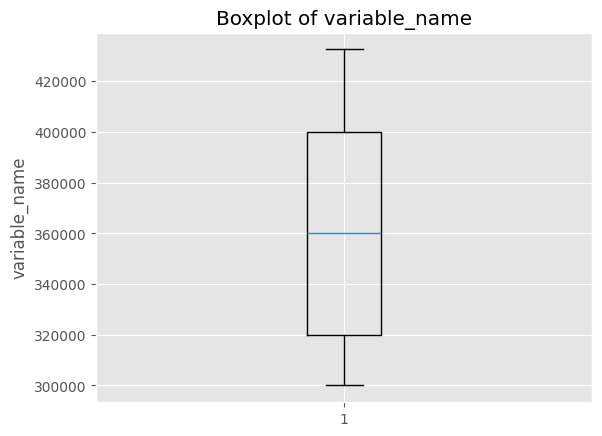

In [ ]:
df_manu = df_manu[df_manu['CUPO_L2'] > 300000]

count_ones = (df_manu['CUPO_L2'] == 1).sum()
print(f"The number of values equal to 1 in CUPO_L2 is now: {count_ones}")
plt.boxplot(df_manu['CUPO_L2'])
plt.title('Boxplot of variable_name')
plt.ylabel('variable_name')
plt.show()

In [ ]:
null_counts = df_manu.isnull().sum()

total_nulls = null_counts.sum()
print(f"\nTotal number of null values across all columns: {total_nulls}")

print("\nNull values per column:")
null_counts


Total number of null values across all columns: 27304

Null values per column:


Id             0
Subsegmento    0
Sexo           0
Region         1
Edad           0
              ..
UsoL1_T01      0
UsoL2_T01      0
UsoLI_T01      0
IndRev_T01     0
target         0
Length: 574, dtype: int64

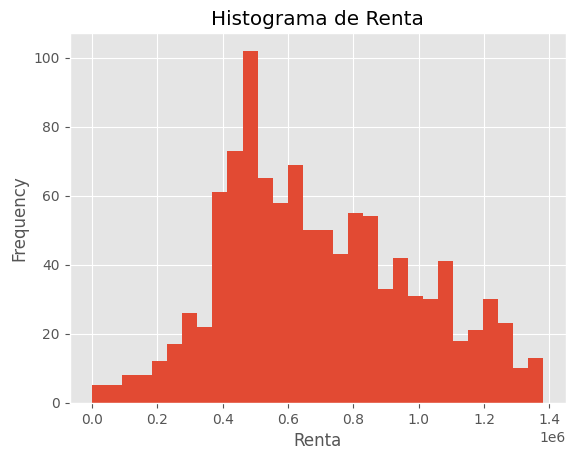

In [ ]:
#histograma de la variable renta

plt.hist(df_manu['Renta'], bins=30)
plt.xlabel('Renta')
plt.ylabel('Frequency')
plt.title('Histograma de Renta')
plt.show()

In [ ]:
numerical_df = df_manu.select_dtypes(include=np.number)

if 'target' in numerical_df.columns:
    numerical_df = numerical_df.drop('target', axis=1)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corrwith(df['target'])

# Convert correlation to percentage
correlation_percentage = correlation_matrix * 100

# Print the correlation matrix as percentage
correlation_percentage

Id              5.954983
Subsegmento     3.504327
Region         -3.642719
Edad           10.559860
Renta          -3.733293
                 ...    
EeccNac_T01    18.769729
EeccInt_T01     1.345002
UsoL1_T01      18.253248
UsoL2_T01      -3.745411
UsoLI_T01       0.261011
Length: 560, dtype: float64

identificar patrones con correlacion positiva entre las variables escogidas

In [ ]:
# Convert the list of lists to a DataFrame
variables_df = pd.DataFrame(df, columns=['Renta', 'Antiguedad', 'Edad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'target','Region','Sexo','Ctacte'])

# Display the variables in the DataFrame
variables_df

Renta  Antiguedad  Edad  CUPO_L1   CUPO_L2  CUPO_MX  target  \
36      528152.0          27    48  2160000  320000.0   2000.0       0   
54      474696.0          23    35  1575000  320000.0   2350.0       0   
65     1380653.0          15    42  1995000  280000.0   3000.0       0   
77      442357.0           8    50  1400000  280000.0   1200.0       0   
84      548957.0          26    34  1360000  280000.0   2100.0       0   
...          ...         ...   ...      ...       ...      ...     ...   
50993   185810.0          60    52  1985000  271000.0   2500.0       0   
51022   503295.0          10    51  1600000  320000.0   3000.0       0   
51028   627893.0          56    50   300000  300000.0    533.0       0   
51050  1043176.0           8    50  1500000  300000.0   2500.0       0   
51066   629034.0          21    50  2025000  300000.0   2000.0       0   

       Region Sexo  Ctacte  
36       13.0    H       1  
54       10.0    H       1  
65       13.0    H       1  
77       13.0    H       1  
84       13.0    M       1  
...       ...  ...     ...  
50993    13.0    M       1  
51022    13.0    H       1  
51028     2.0    H       1  
51050     5.0    M       1  
51066    13.0    M       0  

[1421 rows x 10 columns]

arreglo de variables

In [ ]:
# Eliminar filas con valores nulos en la columna 'Region'
variables_df = variables_df.dropna(subset=['Region'])

In [ ]:
# calcular total de nulos de cada variables y sumar los totales

null_counts = variables_df.isnull().sum()

# Print the total number of null values
total_nulls = null_counts.sum()
print(f"\nTotal number of null values across all columns: {total_nulls}")

# Print null values per column
print("\nNull values per column:")
null_counts



Total number of null values across all columns: 0

Null values per column:


Renta         0
Antiguedad    0
Edad          0
CUPO_L1       0
CUPO_L2       0
CUPO_MX       0
target        0
Region        0
Sexo          0
Ctacte        0
dtype: int64

In [ ]:
#cambiar variable sexo object a int

# Convert 'Sexo' column to numerical values
variables_df['Sexo'] = variables_df['Sexo'].astype('category').cat.codes

# Display the updated DataFrame info
variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1421 entries, 36 to 51066
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Renta       1421 non-null   float64
 1   Antiguedad  1421 non-null   int64  
 2   Edad        1421 non-null   int64  
 3   CUPO_L1     1421 non-null   int64  
 4   CUPO_L2     1421 non-null   float64
 5   CUPO_MX     1421 non-null   float64
 6   target      1421 non-null   int64  
 7   Region      1421 non-null   float64
 8   Sexo        1421 non-null   int8   
 9   Ctacte      1421 non-null   int64  
dtypes: float64(4), int64(5), int8(1)
memory usage: 112.4 KB


In [ ]:
variables_df.head()

Renta  Antiguedad  Edad  CUPO_L1   CUPO_L2  CUPO_MX  target  Region  \
1    143640.0          69    46   750000  150000.0   1000.0       0    13.0   
2    929106.0          24    45  1350000  200000.0   1500.0       0    13.0   
6   1022833.0          21    48   813000  160000.0    600.0       0    13.0   
8   1171066.0          33    49  1996400       1.0   2000.0       1    13.0   
12  1263238.0          80    36   500000       1.0   1500.0       0    13.0   

    Sexo  Ctacte  
1      0       1  
2      0       1  
6      0       1  
8      0       1  
12     0       1

In [ ]:
#Contar valores de una variable

# Count the occurrences of each unique value in the 'Region' column
region_counts = df['Region'].value_counts()

# Print the counts
region_counts

Region
13.0    14802
8.0      1856
5.0      1499
9.0       952
10.0      912
7.0       546
2.0       513
1.0       448
12.0      389
6.0       331
4.0       328
11.0      156
3.0       118
Name: count, dtype: int64

In [ ]:
variables_df = pd.get_dummies(variables_df, columns=['Region'], prefix='Region', dtype=int)
variables_df.head(5)

Renta  Antiguedad  Edad  CUPO_L1   CUPO_L2  CUPO_MX  target  Sexo  \
36   528152.0          27    48  2160000  320000.0   2000.0       0     0   
54   474696.0          23    35  1575000  320000.0   2350.0       0     0   
65  1380653.0          15    42  1995000  280000.0   3000.0       0     0   
77   442357.0           8    50  1400000  280000.0   1200.0       0     0   
84   548957.0          26    34  1360000  280000.0   2100.0       0     1   

    Ctacte  Region_1.0  ...  Region_4.0  Region_5.0  Region_6.0  Region_7.0  \
36       1           0  ...           0           0           0           0   
54       1           0  ...           0           0           0           0   
65       1           0  ...           0           0           0           0   
77       1           0  ...           0           0           0           0   
84       1           0  ...           0           0           0           0   

    Region_8.0  Region_9.0  Region_10.0  Region_11.0  Region_12.0  Region_13.0  
36           0           0            0            0            0            1  
54           0           0            1            0            0            0  
65           0           0            0            0            0            1  
77           0           0            0            0            0            1  
84           0           0            0            0            0            1  

[5 rows x 22 columns]

In [ ]:
# normalizar variables

# Assuming 'variables_df' is your DataFrame with the columns to normalize

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['Renta', 'Antiguedad', 'Edad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX']

# Fit the scaler to your data and transform the selected columns
variables_df[columns_to_normalize] = scaler.fit_transform(variables_df[columns_to_normalize])

# Now, the specified columns in 'variables_df' are normalized between 0 and 1.
variables_df.head()

Renta  Antiguedad      Edad   CUPO_L1   CUPO_L2   CUPO_MX  target  \
36  0.382193    0.223404  0.490566  0.763163  0.777775  0.615385       0   
54  0.343510    0.180851  0.245283  0.535382  0.777775  0.723077       0   
65  0.999099    0.095745  0.377358  0.698917  0.333326  0.923077       0   
77  0.320108    0.021277  0.528302  0.467242  0.333326  0.369231       0   
84  0.397248    0.212766  0.226415  0.451668  0.333326  0.646154       0   

    Sexo  Ctacte  Region_1.0  ...  Region_4.0  Region_5.0  Region_6.0  \
36     0       1           0  ...           0           0           0   
54     0       1           0  ...           0           0           0   
65     0       1           0  ...           0           0           0   
77     0       1           0  ...           0           0           0   
84     1       1           0  ...           0           0           0   

    Region_7.0  Region_8.0  Region_9.0  Region_10.0  Region_11.0  Region_12.0  \
36           0           0           0            0            0            0   
54           0           0           0            1            0            0   
65           0           0           0            0            0            0   
77           0           0           0            0            0            0   
84           0           0           0            0            0            0   

    Region_13.0  
36            1  
54            0  
65            1  
77            1  
84            1  

[5 rows x 22 columns]

In [ ]:
X = variables_df.drop(columns=['target'])

In [ ]:
X.head()

Renta  Antiguedad      Edad   CUPO_L1   CUPO_L2   CUPO_MX  Sexo  \
36  0.382193    0.223404  0.490566  0.763163  0.777775  0.615385     0   
54  0.343510    0.180851  0.245283  0.535382  0.777775  0.723077     0   
65  0.999099    0.095745  0.377358  0.698917  0.333326  0.923077     0   
77  0.320108    0.021277  0.528302  0.467242  0.333326  0.369231     0   
84  0.397248    0.212766  0.226415  0.451668  0.333326  0.646154     1   

    Ctacte  Region_1.0  Region_2.0  ...  Region_4.0  Region_5.0  Region_6.0  \
36       1           0           0  ...           0           0           0   
54       1           0           0  ...           0           0           0   
65       1           0           0  ...           0           0           0   
77       1           0           0  ...           0           0           0   
84       1           0           0  ...           0           0           0   

    Region_7.0  Region_8.0  Region_9.0  Region_10.0  Region_11.0  Region_12.0  \
36           0           0           0            0            0            0   
54           0           0           0            1            0            0   
65           0           0           0            0            0            0   
77           0           0           0            0            0            0   
84           0           0           0            0            0            0   

    Region_13.0  
36            1  
54            0  
65            1  
77            1  
84            1  

[5 rows x 21 columns]

In [ ]:
Z = variables_df

In [ ]:
Z = Z.drop(columns=[col for col in Z.columns if 'Region' in col])
Z.head()

Renta  Antiguedad      Edad   CUPO_L1   CUPO_L2   CUPO_MX  target  \
36  0.382193    0.223404  0.490566  0.763163  0.777775  0.615385       0   
54  0.343510    0.180851  0.245283  0.535382  0.777775  0.723077       0   
65  0.999099    0.095745  0.377358  0.698917  0.333326  0.923077       0   
77  0.320108    0.021277  0.528302  0.467242  0.333326  0.369231       0   
84  0.397248    0.212766  0.226415  0.451668  0.333326  0.646154       0   

    Sexo  Ctacte  
36     0       1  
54     0       1  
65     0       1  
77     0       1  
84     1       1

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


#**MODELO : K_MEANS**  

**Sin PCA**

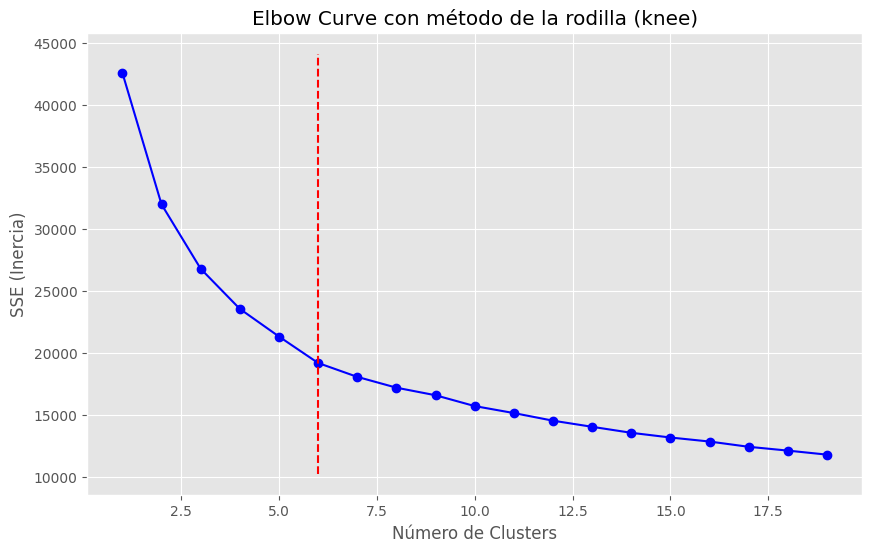

El número óptimo de clusters según el método de la rodilla es: 6


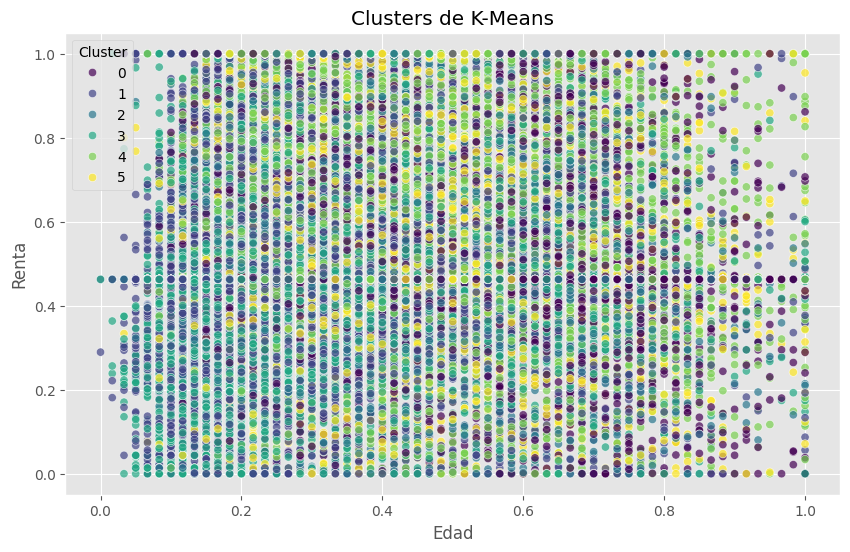

Inercia (SSE): 19183.760765900217
Coeficiente de Silhouette: 0.2859237309622801
Centroides de los clusters:
   Antiguedad      Edad     Renta   CUPO_L1   CUPO_MX   CUPO_L2  ColL1TE_T12  \
0    0.497191  0.472533  0.534163  0.569189  0.554927  0.513945     0.042578   
1    0.175748  0.252745  0.479978  0.192500  0.171347  0.164539     0.048466   
2    0.404297  0.404461  0.511062  0.343143  0.330344  0.319528     0.951620   
3    0.164417  0.241000  0.440029  0.175102  0.160338  0.139788     0.048941   
4    0.507634  0.479867  0.616418  0.617975  0.584542  0.523900     0.047354   
5    0.444417  0.433502  0.572535  0.384171  0.350095  0.331142     0.954734   

   EeccNac_T12  PagoNac_T12        Sexo_M  
0     0.492206     0.413789  1.000000e+00  
1     0.421594     0.164149  3.030909e-14  
2     0.855216     0.290275  1.000000e+00  
3     0.420100     0.154740  1.000000e+00  
4     0.495732     0.430053  6.455947e-14  
5     0.859032     0.298309  1.804112e-14  


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

# Seleccionar características para el clustering
features = ['Antiguedad', 'Edad', 'Renta', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2',
            'ColL1TE_T12', 'EeccNac_T12', 'PagoNac_T12', 'Sexo_M']
X = df_discriminado_out[features].copy()  # Hacemos una copia para evitar SettingWithCopyWarning

# Definir el rango de números de clusters que queremos probar
num_clusters = range(1, 20)
inertias = []  # Sum of Squared Errors (Inercia)

# Aplicar K-Means para cada número de clusters y guardar la inercia
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)  # Usamos los datos ya escalados
    inertias.append(kmeans.inertia_)

# Encontrar el punto de inflexión usando KneeLocator
knee = KneeLocator(num_clusters, inertias, curve='convex', direction='decreasing')

# Graficar la curva de SSE vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertias, marker='o', linestyle='-', color='b')
plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Inercia)')
plt.title('Elbow Curve con método de la rodilla (knee)')
plt.grid(True)
plt.show()

# Número óptimo de clusters según el método de la rodilla
print(f"El número óptimo de clusters según el método de la rodilla es: {knee.elbow}")

# Ajustar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=knee.elbow, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Agregar las etiquetas de los clusters al DataFrame original
X['Cluster'] = clusters

# Visualizar los resultados usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Edad', y='Renta', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters de K-Means')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Calcular inercia y coeficiente de Silhouette
print("Inercia (SSE):", kmeans.inertia_)
silhouette = silhouette_score(X.drop('Cluster', axis=1), clusters)
print("Coeficiente de Silhouette:", silhouette)

# Ver las coordenadas de los centroides
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Centroides de los clusters:")
print(cluster_centers_df)


In [ ]:
# Análisis de los clusters
cluster_summary = X.groupby('Cluster').mean()
cluster_summary


Antiguedad      Edad     Renta   CUPO_L1   CUPO_MX   CUPO_L2  \
Cluster                                                                 
0          0.497127  0.472457  0.534172  0.569002  0.554816  0.513779   
1          0.175747  0.252766  0.480036  0.192528  0.171394  0.164734   
2          0.404297  0.404461  0.511062  0.343143  0.330344  0.319528   
3          0.164352  0.240972  0.439997  0.175082  0.160279  0.139764   
4          0.507920  0.479998  0.616375  0.618211  0.584625  0.523823   
5          0.444304  0.433458  0.572558  0.384099  0.350166  0.331040   

         ColL1TE_T12  EeccNac_T12  PagoNac_T12  Sexo_M  
Cluster                                                 
0           0.042598     0.492225     0.413858     1.0  
1           0.048458     0.421623     0.164195     0.0  
2           0.951620     0.855216     0.290275     1.0  
3           0.048932     0.420069     0.154628     1.0  
4           0.047460     0.495763     0.430225     0.0  
5           0.954799     0.859056     0.298167     0.0

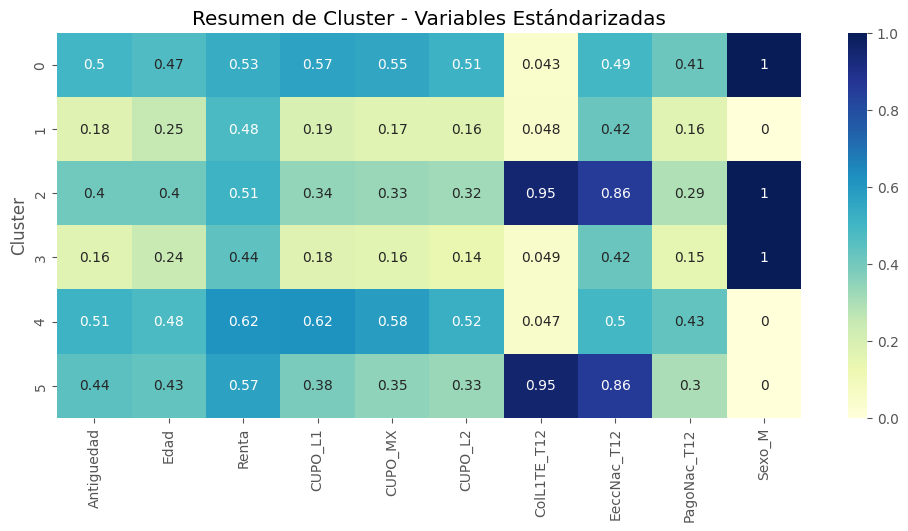

In [ ]:
# Visualización de los centroides
plt.figure(figsize=(12, 5))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Resumen de Cluster - Variables Estándarizadas')
plt.show()

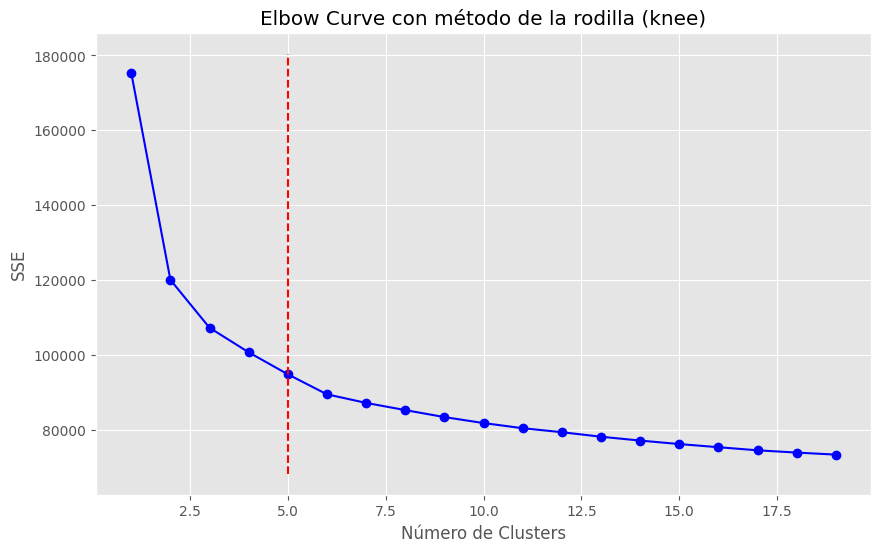

El número óptimo de clusters según el método de la rodilla es: 5
Inercia (SSE): 94799.08250230699
Coeficiente de Silhouette: 0.13598045690257365
Centroides de los clusters:
 [[ 2.47091139e-01  2.89614840e-01  4.58517280e-01  2.74961244e-01
   2.62554260e-01  2.25343255e-01  5.99003296e-02  4.97269006e-02
   4.32547348e-02  4.73269713e-02  5.27647349e-02  5.69739602e-02
   6.50726832e-02  7.42341506e-02  8.33001650e-02  8.87296569e-02
   9.25207525e-02  1.00197115e-01  4.21962618e-01  4.15822417e-01
   4.10539367e-01  4.11484756e-01  4.12750976e-01  4.15420094e-01
   4.18562207e-01  4.21953709e-01  4.24742004e-01  4.56030779e-01
   4.32754762e-01  4.39191503e-01  1.65860375e-01  1.71488280e-01
   1.72376439e-01  1.71416176e-01  1.74315750e-01  1.78325551e-01
   1.85744958e-01  1.81412551e-01  1.93220112e-01  1.95203329e-01
   2.04173078e-01  1.97826226e-01  0.00000000e+00  1.00000000e+00]
 [ 3.94294783e-01  4.20850687e-01  5.42367459e-01  3.56237359e-01
   3.39898391e-01  3.29944317e-01

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

# Definir el rango de números de clusters que queremos probar
num_clusters = range(1, 20)
inertias = []  # Sum of Squared Errors

# Aplicar K-Means para cada número de clusters y guardar la inercia
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df1)
    inertias.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Encontrar el punto de inflexión usando KneeLocator
knee = KneeLocator(num_clusters, inertias, curve='convex', direction='decreasing')

# Graficar la curva de SSE vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertias, marker='o', linestyle='-', color='b')
plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve con método de la rodilla (knee)')
plt.grid(True)
plt.show()

# Número óptimo de clusters según el método de la rodilla
print(f"El número óptimo de clusters según el método de la rodilla es: {knee.elbow}")

# Ajustar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=knee.elbow, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df1)



# Añadir las etiquetas de los clusters al DataFrame original
df1['Cluster'] = clusters

# Calcular inercia y coeficiente de Silhouette
print("Inercia (SSE):", kmeans.inertia_)
silhouette = silhouette_score(df1.drop('Cluster', axis=1), clusters)
print("Coeficiente de Silhouette:", silhouette)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
print("Centroides de los clusters:\n", centroids)



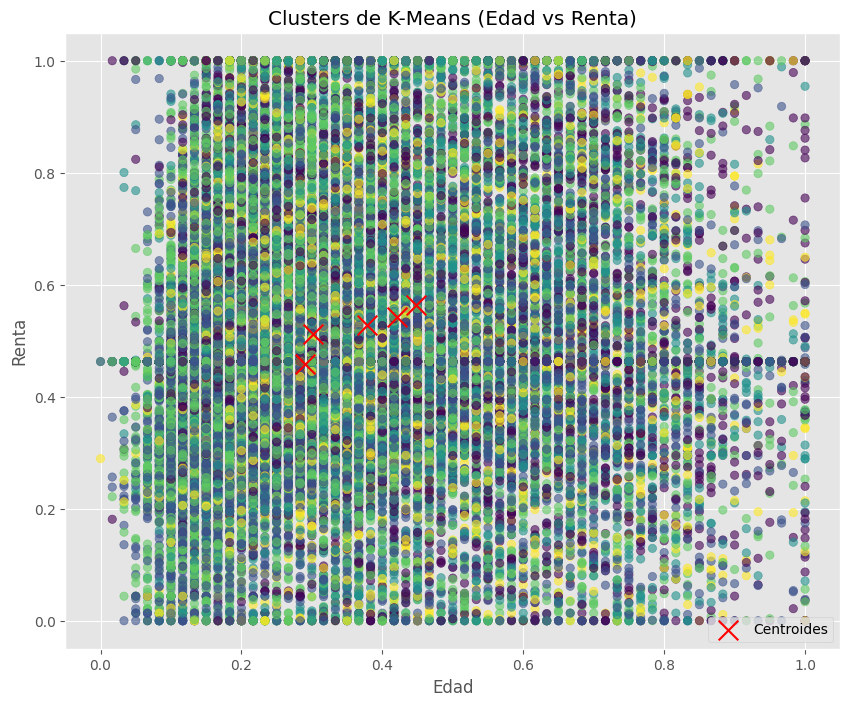

In [ ]:
# Supongamos que las columnas 'Edad' y 'Renta' son las que quieres graficar
plt.figure(figsize=(10, 8))
plt.scatter(df1['Edad'], df1['Renta'], c=df1['Cluster'], cmap='viridis', alpha=0.6)

# Agregar los centroides al gráfico
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, df1.columns.get_loc('Edad')], centroids[:, df1.columns.get_loc('Renta')],
            c='red', marker='x', s=200, label='Centroides')

plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Clusters de K-Means (Edad vs Renta)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

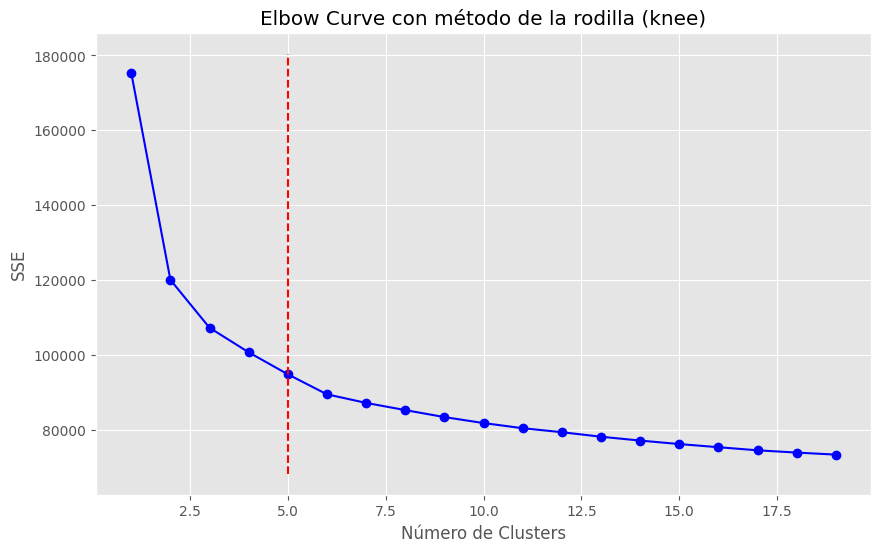

El número óptimo de clusters según el método de la rodilla es: 5
Inercia (SSE): 94799.08250230699
Coeficiente de Silhouette: 0.13598045690257365
Centroides de los clusters: [[ 2.47091139e-01  2.89614840e-01  4.58517280e-01  2.74961244e-01
   2.62554260e-01  2.25343255e-01  5.99003296e-02  4.97269006e-02
   4.32547348e-02  4.73269713e-02  5.27647349e-02  5.69739602e-02
   6.50726832e-02  7.42341506e-02  8.33001650e-02  8.87296569e-02
   9.25207525e-02  1.00197115e-01  4.21962618e-01  4.15822417e-01
   4.10539367e-01  4.11484756e-01  4.12750976e-01  4.15420094e-01
   4.18562207e-01  4.21953709e-01  4.24742004e-01  4.56030779e-01
   4.32754762e-01  4.39191503e-01  1.65860375e-01  1.71488280e-01
   1.72376439e-01  1.71416176e-01  1.74315750e-01  1.78325551e-01
   1.85744958e-01  1.81412551e-01  1.93220112e-01  1.95203329e-01
   2.04173078e-01  1.97826226e-01  0.00000000e+00  1.00000000e+00]
 [ 3.94294783e-01  4.20850687e-01  5.42367459e-01  3.56237359e-01
   3.39898391e-01  3.29944317e-01 

In [ ]:
# Definir el rango de números de clusters que queremos probar
num_clusters = range(1, 20)
inertias = []  # Sum of Squared Errors

# Aplicar K-Means para cada número de clusters y guardar la inercia
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df1)
    inertias.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Encontrar el punto de inflexión usando KneeLocator
knee = KneeLocator(num_clusters, inertias, curve='convex', direction='decreasing')

# Graficar la curva de SSE vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertias, marker='o', linestyle='-', color='b')
plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve con método de la rodilla (knee)')
plt.grid(True)
plt.show()

# Número óptimo de clusters según el método de la rodilla
print(f"El número óptimo de clusters según el método de la rodilla es: {knee.elbow}")

# Ajustar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=knee.elbow, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df1)

# Añadir las etiquetas de los clusters al DataFrame original
df1['Cluster'] = clusters

# Calcular inercia y coeficiente de Silhouette
print("Inercia (SSE):", kmeans.inertia_)
silhouette = silhouette_score(df1.drop('Cluster', axis=1), clusters)
print("Coeficiente de Silhouette:", silhouette)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Mostrar los centroides
print("Centroides de los clusters:", centroids)

In [ ]:
# Supongamos que las columnas 'Edad' y 'Renta' son las que quieres graficar
plt.figure(figsize=(10, 8))
plt.scatter(df1['Edad'], df1['Renta'], c=df1['Cluster'], cmap='viridis', alpha=0.6)

# Agregar los centroides al gráfico
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, df1.columns.get_loc('Edad')], centroids[:, df1.columns.get_loc('Renta')],
            c='red', marker='x', s=200, label='Centroides')

plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Clusters de K-Means (Edad vs Renta)')
plt.legend()
plt.grid(True)
plt.show()


**Centroides**
 los centroides de cada cluster después de aplicar el algoritmo K-Means. Cada fila corresponde a un cluster y cada columna muestra el valor medio de una variable específica para ese cluster. Aquí tienes un análisis básico basado en los centroides

In [ ]:
# Análisis de los clusters
cluster_summary = df1.groupby('Cluster').mean()
cluster_summary


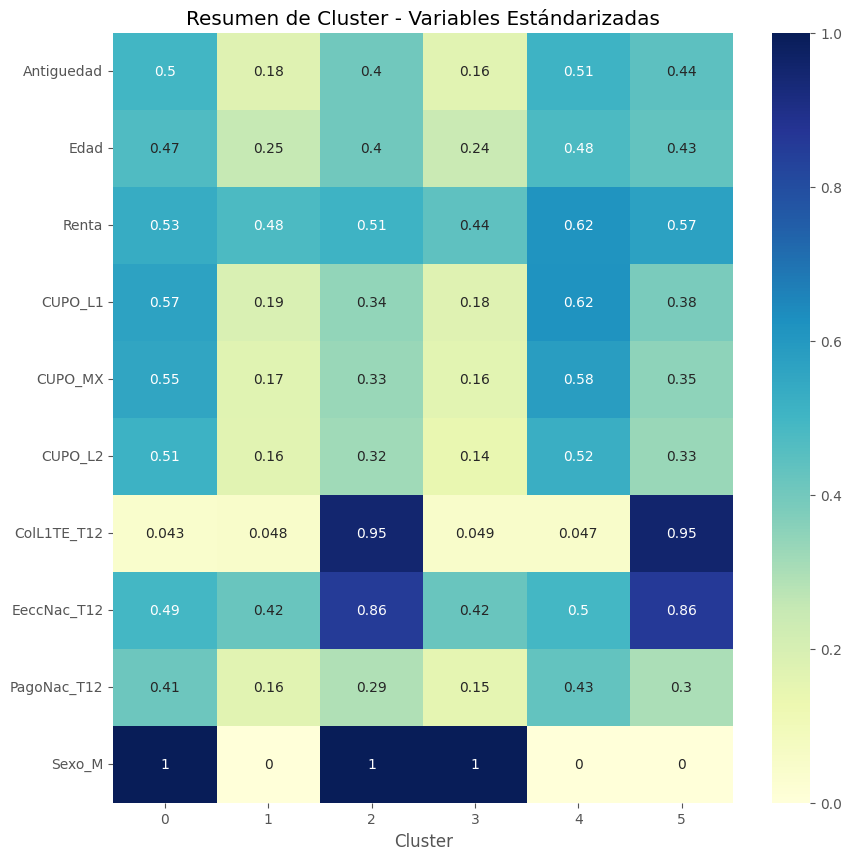

In [ ]:
# Visualización de los centroides
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Resumen de Cluster - Variables Estándarizadas')
plt.show()


##**Interpretación de los Clusters**



**Cluster 0**  Este cluster tiene clientes con renta relativamente alta y valores medios en el uso de crédito. La baja puntuación en ColL1TE_T12 (revolving)sugiere que estos clientes tienen menos deudas recientes en su tarjeta de crédito. Esto podría indicar que se trata de un grupo de clientes con alta solvencia y un comportamiento financiero más controlado.


---




**Cluster 1**

 Este cluster se caracteriza por clientes con un alto endeudamiento reciente (ColL1TE_T12), pero valores relativamente bajos en las líneas de crédito. Esto podría sugerir que son clientes con deudas recientes, pero con límites de crédito limitados. La renta media podría indicar que tienen un nivel de ingresos moderado.

ColL1TE_T12: 0.84 alto, indica un alto nivel de endeudamiento,
Sexo_M: 0.0 probablemente compuesto mayormente por mujeres.





**Cluster 2**

ColL1TE_T12: 0.49 moderado, pero no tan alto,
Sexo_M: 0.0 probablemente compuesto mayormente por mujere,

 Los clientes de este cluster parecen tener una renta media y líneas de crédito bajas. La puntuación de ColL1TE_T12 indica que tienen un nivel de deuda moderado. Este grupo podría incluir clientes que están en el proceso de aumentar su endeudamiento o aquellos con menos acceso a crédito, pero que aún no se encuentran en un nivel de riesgo alto.


---




**Cluster 3**

 ColL1TE_T12: 0.06 ,muy bajo, indica casi sin endeudamiento.
Sexo_M: 0.0 probablemente compuesto mayormente por mujeres.

Este cluster representa a clientes con muy baja renta y casi sin endeudamiento (baja puntuación en ColL1TE_T12). Los clientes en este grupo podrían ser de ingresos bajos o inestables, con poco acceso a crédito. Son clientes que probablemente se encuentran en una situación financiera más precaria, sin un historial significativo de uso de tarjetas de crédito.


**Analisis**

Los clientes del cluster 0 parecen ser los más sólidos desde el punto de vista financiero, con alta renta y baja deuda.

Son clientes que podrían ser objetivo para productos financieros premium, como tarjetas de crédito de alta gama, préstamos a bajas tasas de interés, etc.


---


Los clientes del cluster 1 tienen un alto nivel de deuda, lo que podría indicar un mayor riesgo financiero o clientes que están utilizando más crédito.

Este grupo podría requerir atención especial para gestionar el riesgo de crédito, como ofrecer soluciones para consolidar deudas o mejorar las condiciones de sus productos.



---


El cluster 2 tiene una situación intermedia, con niveles bajos de crédito y deuda moderada.

Estos clientes pueden estar en una etapa de crecimiento en su relación con las entidades financieras, por lo que podrían ser considerados para ofrecerles más opciones de crédito a medida que demuestran responsabilidad financiera.

---


El cluster 3 tiene clientes con ingresos bajos y casi sin deuda, lo que puede indicar que tienen menos acceso a productos financieros.

Este grupo podría necesitar productos financieros más accesibles, como microcréditos, y soluciones para mejorar su historial crediticio.

---










**CONCLUSION**

K-Means ha permitido identificar y categorizar patrones financieros significativos.Segmentación de clientes permiten entender los patrones o comportamientos comunes de los clientes dentro de cada grupo. Se puede utilizar esta información para ofrecer productos adecuados a cada segmento o realizar análisis de riesgo.






# **PCA con dos componentes**

Componentes principales:
 [[ 8.95165087e-03  8.89216486e-03 -2.34439657e-02  1.80864742e-02
   1.00291534e-02  1.49197591e-02  2.81410321e-01 -2.72243792e-02
  -5.58441546e-02 -4.08942150e-02 -1.66024903e-02 -2.64183160e-02
  -1.71014090e-01 -4.29290260e-02 -4.36171492e-02 -2.27909823e-01
  -8.10120000e-02 -1.17921083e-01 -1.23953976e-02 -5.99851747e-02
   8.96542919e-01]
 [-6.44715332e-02  8.25202166e-03  1.71598337e-02 -1.78276468e-02
  -2.10198817e-02 -2.88877870e-04  9.56454948e-01 -1.99535870e-02
   1.63501253e-02  5.37356003e-03  4.34853307e-04 -1.58100863e-03
   4.68939472e-02  4.95363421e-03  1.03570172e-02  9.27097689e-02
   3.64930977e-02  2.49786049e-02  4.72046057e-03  1.53719856e-02
  -2.57056046e-01]]

Varianza explicada por cada componente: [0.23055561 0.20785721]

Datos transformados (PCA):
       Componente_1  Componente_2
0         0.264815     -0.511085
1        -0.747136     -0.227087
2         0.270827     -0.543456
3         0.248095     -0.493414
4         0.5428

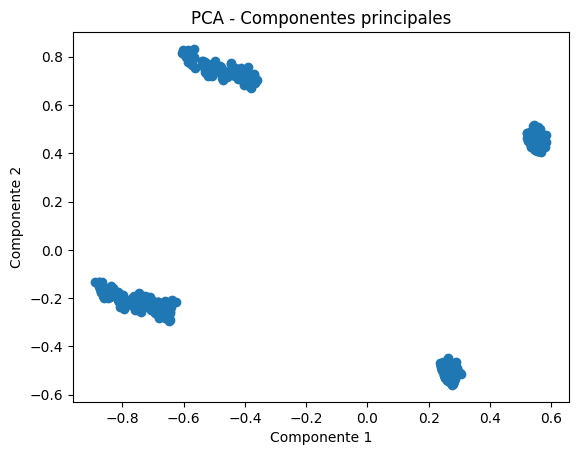

In [ ]:
from sklearn.decomposition import PCA
# Paso 1: Aplicar PCA
pca = PCA(n_components=2)  # Definir el número de componentes principales (2 en este caso)
X_pca = pca.fit_transform(X)  # Aplica PCA a los datos escalados

# Paso 2: Ver los resultados
print("Componentes principales:\n", pca.components_)
print("\nVarianza explicada por cada componente:", pca.explained_variance_ratio_)

# Paso 3: Convertir el resultado PCA en un DataFrame para visualización
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])

# Mostrar el DataFrame resultante con las componentes principales
print("\nDatos transformados (PCA):\n", pca_df)

# Paso 4: Visualizar los resultados en un gráfico de dispersión
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'])
plt.title('PCA - Componentes principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

Vemos que al aplicar PCA con dos componentes, estos explican casi la mitad de la varianza total, especificamente el 45.8%, no necesariamente es malo, podemos usarlo para modelar un kmeans en base a esto, pero veremos opciones de 3 componentes y 4 componentes para comparar resultados y ver que tal explican la varianza total

## **PCA con 3 Componentes**

Componentes principales:
 [[ 8.95165087e-03  8.89216486e-03 -2.34439657e-02  1.80864742e-02
   1.00291534e-02  1.49197591e-02  2.81410321e-01 -2.72243792e-02
  -5.58441546e-02 -4.08942150e-02 -1.66024903e-02 -2.64183160e-02
  -1.71014090e-01 -4.29290260e-02 -4.36171492e-02 -2.27909823e-01
  -8.10120000e-02 -1.17921083e-01 -1.23953976e-02 -5.99851747e-02
   8.96542919e-01]
 [-6.44715332e-02  8.25202166e-03  1.71598337e-02 -1.78276468e-02
  -2.10198817e-02 -2.88877870e-04  9.56454948e-01 -1.99535870e-02
   1.63501253e-02  5.37356003e-03  4.34853307e-04 -1.58100863e-03
   4.68939472e-02  4.95363421e-03  1.03570172e-02  9.27097689e-02
   3.64930977e-02  2.49786049e-02  4.72046057e-03  1.53719856e-02
  -2.57056046e-01]
 [ 1.14468796e-01  2.88354416e-01  2.74576848e-01  2.74353152e-01
   5.07285999e-01  2.60881289e-01  2.46231571e-02 -5.09547286e-02
   3.00925057e-02  3.57372006e-02  2.74436002e-03  2.56761021e-03
   4.12031098e-01  1.65986393e-02  1.92894265e-02 -4.94597552e-01
   5.1520214

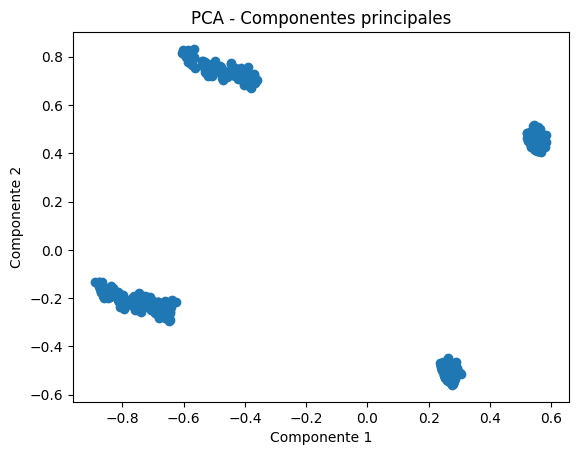

In [ ]:
from sklearn.decomposition import PCA
# Paso 1: Aplicar PCA
pca = PCA(n_components=3)  # Definir el número de componentes principales (2 en este caso)
X_pca = pca.fit_transform(X)  # Aplica PCA a los datos escalados

# Paso 2: Ver los resultados
print("Componentes principales:\n", pca.components_)
print("\nVarianza explicada por cada componente:", pca.explained_variance_ratio_)

# Paso 3: Convertir el resultado PCA en un DataFrame para visualización
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2','componente_3'])

# Mostrar el DataFrame resultante con las componentes principales
print("\nDatos transformados (PCA):\n", pca_df)

# Paso 4: Visualizar los resultados en un gráfico de dispersión
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'])
plt.title('PCA - Componentes principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

El PCA de 3 componentes explica un 50 % de la varianza total, lo que significa que en relacion al anterior resultado los dos primeros componentes bajaron rendimiento y el tercero no logra explicar mucho mas en comparacion con los dos primeros se queda atras, por lo que en relacion a que los componentes en terminos idoneos deberian explicar entre el 70% y 80%, haremos un contraste con el pca de 4 componentes y 2 componentes

#**PCA con cuatro componentes para explicar el modelo**

Componentes principales:
 [[-8.19204639e-03 -1.17824670e-02 -2.32009215e-02 -9.30038516e-03
  -2.02899768e-02 -3.00372466e-04  3.81290029e-01 -3.80430043e-02
  -4.43808640e-02 -5.03454230e-02 -1.10548613e-02 -2.90471078e-02
  -1.70668661e-01 -3.11347521e-02 -5.06566346e-02 -2.32570523e-01
  -9.41939435e-02 -9.51835630e-02 -1.42908240e-02 -3.68289155e-02
   8.60356073e-01]
 [-5.01411427e-02 -4.47878623e-03 -4.75345124e-03 -2.25676941e-02
  -2.46886659e-02 -2.29197909e-02  9.21565406e-01 -4.15541299e-03
   1.06256057e-02  1.50070493e-02  2.59173399e-03  1.47639452e-02
   7.78973722e-02  1.05196738e-02  2.47179502e-02  9.78445978e-02
   5.06885416e-02  3.30227346e-02  4.52216347e-03  1.23956628e-02
  -3.54597031e-01]
 [ 2.31211666e-01  2.11102206e-01  1.82990134e-01  5.12184946e-01
   5.34664759e-01  5.61245257e-01  5.71325450e-02  1.51302277e-02
  -4.74985954e-05 -3.34394818e-03 -1.30237604e-03 -3.04809735e-03
   1.00178264e-02  1.00163132e-02  1.02957476e-02 -3.06867216e-02
  -1.3450076

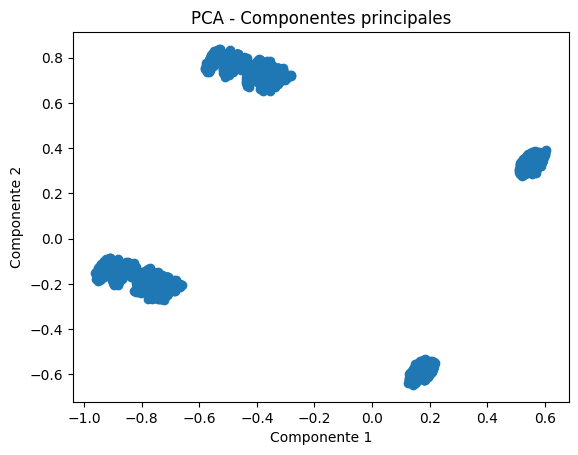

In [ ]:
# Paso 1: Aplicar PCA
pca = PCA(n_components=4)  # Definir el número de componentes principales (4 en este caso)
X_pca = pca.fit_transform(X)  # Aplica PCA a los datos escalados

# Paso 2: Ver los resultados
print("Componentes principales:\n", pca.components_)
print("\nVarianza explicada por cada componente:", pca.explained_variance_ratio_)

# Paso 3: Convertir el resultado PCA en un DataFrame para visualización
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2', 'Componente_3', 'Componente_4'])

# Mostrar el DataFrame resultante con las componentes principales
print("\nDatos transformados (PCA):\n", pca_df)

# Paso 4: Visualizar los resultados en un gráfico de dispersión de las dos primeras componentes
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'])
plt.title('PCA - Componentes principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


Estos 4 componentes capturan un 77% de la varianza total, por lo que es mas util que uno de 2 componentes por ejemplo que explican 46%, podemos modelar K-means con ambos para ver las diferencias en las metricas como silhouette e inercia entre uno y otro

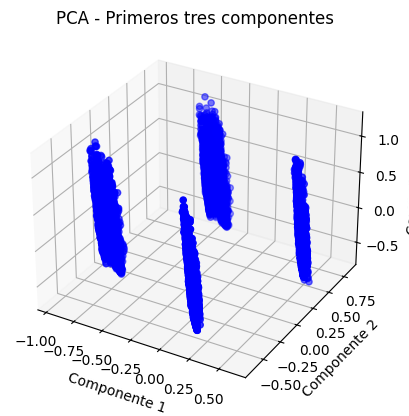

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Gráfico 3D de las primeras tres componentes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['Componente_1'], pca_df['Componente_2'], pca_df['Componente_3'], c='blue', marker='o')
ax.set_title('PCA - Primeros tres componentes')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

plt.show()

# **Modelado : K-Means**

##**`Modelo 1 K-means`**

K-means con ejecucion de dos componentes de pca, numero de clusters 3

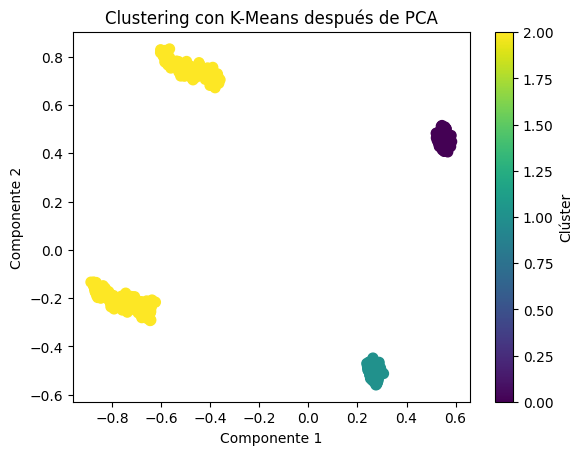


Centros de los clústeres:
 [[ 0.54512988  0.44930017]
 [ 0.26358573 -0.51195516]
 [-0.64433364  0.16655472]]


In [ ]:
from sklearn.cluster import KMeans

# Paso 3: Convertir el resultado PCA en un DataFrame
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])

# Paso 4: Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Número de clústeres: 3 (puedes ajustarlo)
pca_df['Cluster'] = kmeans.fit_predict(X_pca)  # Asignar los clústeres a cada punto

# Paso 5: Visualizar los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Clustering con K-Means después de PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Clúster')
plt.show()

# (Opcional) Mostrar los centros de los clústeres
centros = kmeans.cluster_centers_
print("\nCentros de los clústeres:\n", centros)

In [ ]:
print("Inercia (SSE):", kmeans.inertia_)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca, kmeans.labels_)
print("Coeficiente de Silhouette:", silhouette)


Inercia (SSE): 131.418543837669
Coeficiente de Silhouette: 0.7967502603211687


Obtenemos con 3 cluster, 131 de inercia y un silhouette de 79, bastante alto este ultimo, lo cual indica que los clusters estan bien separados y definidos unos de otros, esto es una buena medida, en relacion a la inercia, la compararemos con la de un modelo de k-means con 5 clusters para determinar cualo es mejor pero hasta el momento el valor es alto, por lo que esperamos baje con una mayor cantidad de clusters ya que este numero indica que no tiene tan buen agrupamiento, a menor inercia mejor agrupamiento entre los puntos respecto de sus centroides

## **Modelo 2 *K*-means**

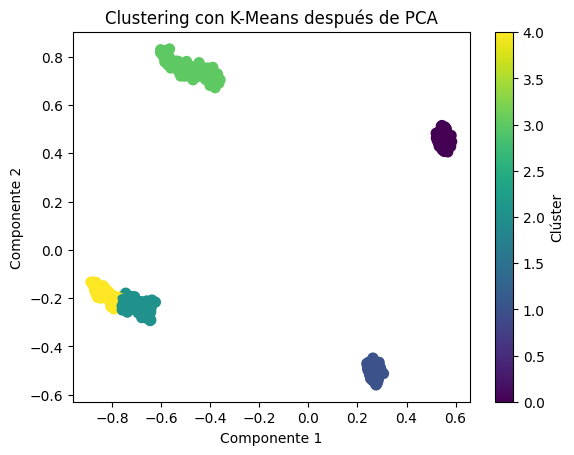


Centros de los clústeres:
 [[ 0.54512988  0.44930017]
 [ 0.26358573 -0.51195516]
 [-0.69875811 -0.23511776]
 [-0.48022399  0.74970113]
 [-0.83362139 -0.18371997]]


In [ ]:
from sklearn.cluster import KMeans

# Paso 3: Convertir el resultado PCA en un DataFrame
pca_df = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])

# Paso 4: Aplicar K-Means
kmeans = KMeans(n_clusters=5, max_iter=500, random_state=42)  # Número de clústeres: 3 (puedes ajustarlo)
pca_df['Cluster'] = kmeans.fit_predict(X_pca)  # Asignar los clústeres a cada punto

# Paso 5: Visualizar los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Clustering con K-Means después de PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Clúster')
plt.show()

# (Opcional) Mostrar los centros de los clústeres
centros = kmeans.cluster_centers_
print("\nCentros de los clústeres:\n", centros)

In [ ]:
print("Inercia (SSE):", kmeans.inertia_)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca, kmeans.labels_)
print("Coeficiente de Silhouette:", silhouette)

Inercia (SSE): 45.54859136664178
Coeficiente de Silhouette: 0.905713951129739


Al ejecutar un k-means, con 5 clusters, baja la inercia a 45 indicando que obtenemos un mejor agrupamiento de parte de los puntos respecto de sus centroides, ademas el indice silhouette, ha subido 11 puntos respecto del k-means anterior lo que indica que los clusters estan mucho mejor definidos que el modelo anterior con el valor de 90%

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
# Ajustar el modelo a los datos
kmeans.fit(X)
# Obtener las etiquetas (clusters asignados)
labels = kmeans.labels_
# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
# Obtener la inercia (SSE)
inertia = kmeans.inertia_
# Coeficiente de Silhouette (si deseas evaluar la calidad del clustering)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, labels)
# Mostrar resultados
print("Etiquetas (Clusters asignados):", labels)
print("Centroides de los clusters:", centroids)
print("Inercia (SSE):", inertia)
print("Coeficiente de Silhouette:", silhouette)

Etiquetas (Clusters asignados): [2 4 2 ... 4 4 0]
Centroides de los clusters: [[ 4.62051913e-01  2.52047371e-01  3.34638661e-01  5.21638657e-01
   4.69641696e-01  5.87417707e-01  1.00000000e+00  9.47169811e-01
   2.83018868e-02  1.69811321e-02  5.66037736e-03  7.54716981e-03
  -3.33066907e-16  1.69811321e-02  2.07547170e-02  1.00000000e-01
   3.05311332e-16  4.71698113e-02  7.54716981e-03  2.83018868e-02
   7.20754717e-01]
 [ 4.89888691e-01  6.49398705e-01  4.56439705e-01  5.87844787e-01
   5.20299501e-01  4.93894314e-01 -5.55111512e-16  8.95652174e-01
  -3.46944695e-17  1.38777878e-17  1.56125113e-17  1.56125113e-17
  -1.52655666e-16  2.08166817e-17  1.38777878e-17  1.11022302e-16
  -2.77555756e-17  8.32667268e-17  1.38777878e-17  4.51028104e-17
   1.00000000e+00]
 [ 5.26311621e-01  1.22651724e-01  2.93917135e-01  5.24250183e-01
   4.93821320e-01  6.19162263e-01  9.43689571e-16  9.89821883e-01
   5.89805982e-17 -1.04083409e-16  3.46944695e-17 -5.72458747e-17
  -3.19189120e-16 -1.94289

Con el mismo numero de cluster y sin utilizar pca para reducir dimencionalidad y facilitar el analisis, el modelo de kmeans sin mayores ajustes empeora bastante sus metricas obteniendo una inercia de 1010 lo que significa que los puntos estan muy lejos de sus centroides y esto tambien reflejandose en el indice de silhouette, ya que tiene un 17% lo que significa que no hay mucha separacion entre clusters y estos estan muy mal definidos ya que no se logran diferencia unos de otros en terminos de puntos

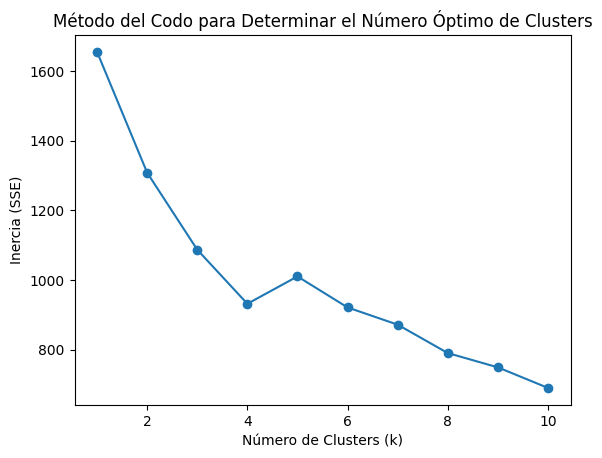

In [ ]:
k_range = range(1, 11)  # Probar de 1 a 10 clusters

# Calcular la inercia para cada valor de k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el "método del codo"
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

Como vemos el metodo del codo, no nos da una respuesta clara en relacion al grafico de donde establecer la cantidad de clusters, en este kmeans lo utilizamos para que nos ayude a determinar la cantidad, en los anteriores no ya que nos dio buenas metricas por lo tanto no fue tan necesario a nuestro criterio

se ve una diferencia notable a la hora de usar PCA ya que como tenemos varias variables, y este reduce la dimencionalidad escogiendo los componentes principales para ser analisis de forma mas eficiente.

ahora para verificar utilizaremos un numero mayor de iteraciones para analizar el resultado y si tiene algun efecto positivo en las metricas de desempeño

## **Modelo 3 K-mean**s

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=500, random_state=42)
# Ajustar el modelo a los datos
kmeans.fit(X)
# Obtener las etiquetas (clusters asignados)
labels = kmeans.labels_
# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
# Obtener la inercia (SSE)
inertia = kmeans.inertia_
# Coeficiente de Silhouette (si deseas evaluar la calidad del clustering)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, labels)
# Mostrar resultados
print("Etiquetas (Clusters asignados):", labels)
print("Centroides de los clusters:", centroids)
print("Inercia (SSE):", inertia)
print("Coeficiente de Silhouette:", silhouette)

Etiquetas (Clusters asignados): [2 4 2 ... 4 4 0]
Centroides de los clusters: [[ 4.62051913e-01  2.52047371e-01  3.34638661e-01  5.21638657e-01
   4.69641696e-01  5.87417707e-01  1.00000000e+00  9.47169811e-01
   2.83018868e-02  1.69811321e-02  5.66037736e-03  7.54716981e-03
  -3.33066907e-16  1.69811321e-02  2.07547170e-02  1.00000000e-01
   3.05311332e-16  4.71698113e-02  7.54716981e-03  2.83018868e-02
   7.20754717e-01]
 [ 4.89888691e-01  6.49398705e-01  4.56439705e-01  5.87844787e-01
   5.20299501e-01  4.93894314e-01 -5.55111512e-16  8.95652174e-01
  -3.46944695e-17  1.38777878e-17  1.56125113e-17  1.56125113e-17
  -1.52655666e-16  2.08166817e-17  1.38777878e-17  1.11022302e-16
  -2.77555756e-17  8.32667268e-17  1.38777878e-17  4.51028104e-17
   1.00000000e+00]
 [ 5.26311621e-01  1.22651724e-01  2.93917135e-01  5.24250183e-01
   4.93821320e-01  6.19162263e-01  9.43689571e-16  9.89821883e-01
   5.89805982e-17 -1.04083409e-16  3.46944695e-17 -5.72458747e-17
  -3.19189120e-16 -1.94289

Comprobamos que el numero de iteraciones no hace diferencia alguna para este caso especifico, por lo que el mejor modelo hasta ahora es el de kmeans con uso de PCA en 5 clusters

#**Clustering Jerarquico**





## **Modelo 1 Clustering Jerarquico**

Etiquetas (Clusters asignados): [2 0 2 ... 0 4 1]
Coeficiente de Silhouette: 0.30106303990698086


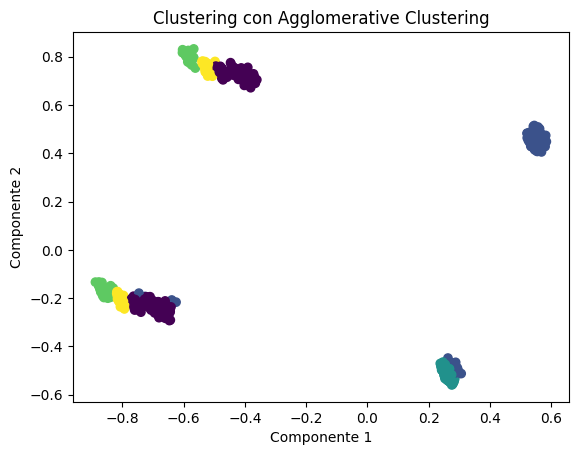

In [ ]:
# Importar las librerías necesarias
from sklearn.cluster import AgglomerativeClustering
# Crear el modelo de Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Puedes ajustar el número de clusters
# Ajustar el modelo
labels = agg_clustering.fit_predict(X)
# Evaluar la calidad del clustering usando el coeficiente de Silhouette
silhouette = silhouette_score(X, labels)
# Mostrar los resultados
print("Etiquetas (Clusters asignados):", labels)
print("Coeficiente de Silhouette:", silhouette)
# Si quieres visualizar los resultados (solo aplicable para 2D o 3D):
# Si X tiene muchas dimensiones, puedes usar PCA para reducir la dimensionalidad a 2D o 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Graficar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Clustering con Agglomerative Clustering")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


Comparamos mediante el uso del arreglo Z el cual no contiene las variables de Region que se desglosaron del one hot incoding debido a la representacion de sus categorias como regiones

## **Modelo 2 Clustering Jerarquico**

Etiquetas (Clusters asignados): [0 0 0 ... 0 1 3]
Coeficiente de Silhouette: 0.2995028216149777


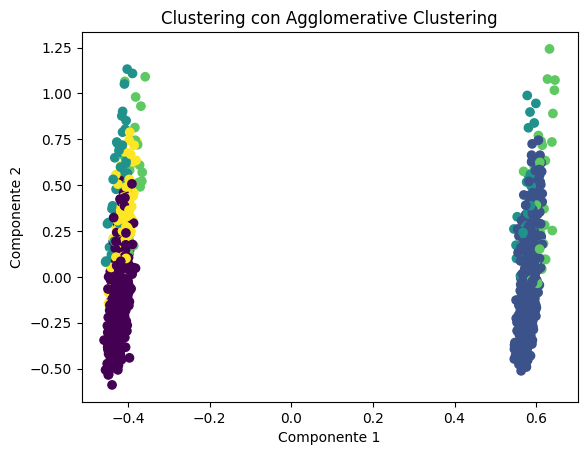

In [ ]:
# Importar las librerías necesarias
from sklearn.cluster import AgglomerativeClustering
# Crear el modelo de Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Puedes ajustar el número de clusters
# Ajustar el modelo
labels = agg_clustering.fit_predict(Z)
# Evaluar la calidad del clustering usando el coeficiente de Silhouette
silhouette = silhouette_score(Z, labels)
# Mostrar los resultados
print("Etiquetas (Clusters asignados):", labels)
print("Coeficiente de Silhouette:", silhouette)
# Si quieres visualizar los resultados (solo aplicable para 2D o 3D):
# Si X tiene muchas dimensiones, puedes usar PCA para reducir la dimensionalidad a 2D o 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Z)
# Graficar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Clustering con Agglomerative Clustering")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


Para este tampoco hace mucha diferencia

# **DBSCAN**

## **MOdelo 1 DBSCAN**

1.0 distancia entre puntos por cluster y 40 la cantidad minima de puntos

Conteo de los clústeres:
  0    492
 2    358
-1    357
 3     63
 5     57
 4     52
 1     42
Name: count, dtype: int64


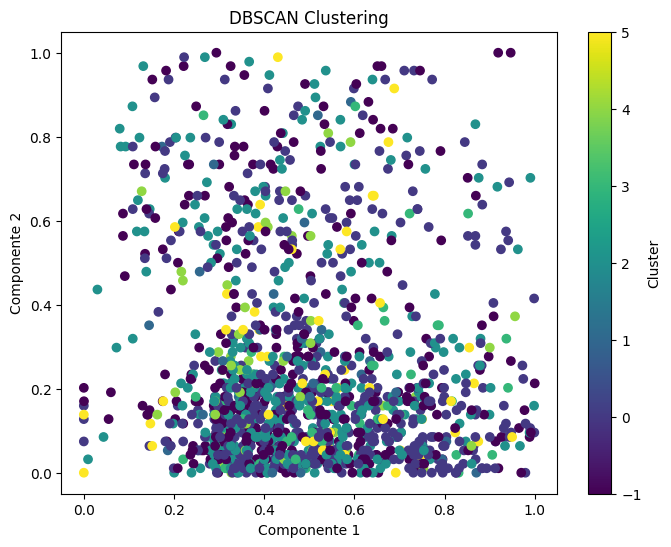

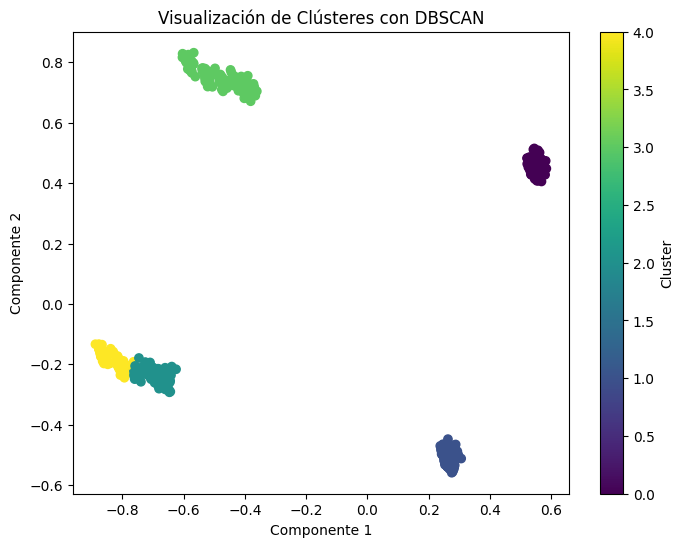

Índice de Silueta: 0.5039384526203947
Número de clústeres: 6


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Asegúrate de que df_scaled sea un array de NumPy (si no lo es)
# Si df_scaled es un DataFrame de pandas, convierte a un array de NumPy
df_scaled_array = X.values if isinstance(X, pd.DataFrame) else X

# Paso 1: Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=40)  # Parámetros típicos (ajustar según sea necesario)
dbscan.fit(df_scaled_array)  # Ajusta el modelo DBSCAN a los datos escalados

# Paso 2: Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Mostrar la cantidad de puntos en cada clúster
import pandas as pd
cluster_counts = pd.Series(labels).value_counts()
print("Conteo de los clústeres:\n", cluster_counts)

# Paso 3: Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
# Se colorean los puntos según el clúster al que pertenecen
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame con las componentes principales (pca_df)
# y las etiquetas de los clústeres en la columna 'Cluster'
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreando según los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Añadir una barra de color para mostrar los clústeres
plt.colorbar(label='Cluster')

# Título y etiquetas
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar gráfico
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, dbscan.labels_)
print("Índice de Silueta:", silhouette_avg)
import numpy as np
n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Número de clústeres:", n_clusters)




DBSCAN obtiene mejores metricas que los dos modelos anteriores sin usar PCA, el 50 porciento del indice de silhuouette indica que el cluster esta definido a un termino medio, variaremos los parametros de DBSCAN para obtener mejores metricas

Prueba de posibles combinaciones para saber la menor cantidad de puntos de ruido



In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Prueba con diferentes combinaciones de eps y min_samples
eps_values = [0.3, 0.5, 0.7, 1.0]  # Valores de eps ajustados a los datos
min_samples_values = [5, 10, 20, 50, 100]  # Valores típicos de min_samples para muestras grandes

# Evaluar cada combinación
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_scaled_array)  # Asegúrate de usar los datos escalados

        # Contar el número de clústeres y puntos de ruido
        n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        noise_points = np.sum(dbscan.labels_ == -1)

        print(f"Para eps={eps} y min_samples={min_samples}:")
        print(f"Número de clústeres: {n_clusters}")
        print(f"Puntos de ruido: {noise_points}")
        print("-" * 30)


Para eps=0.3 y min_samples=5:
Número de clústeres: 18
Puntos de ruido: 639
------------------------------
Para eps=0.3 y min_samples=10:
Número de clústeres: 3
Puntos de ruido: 798
------------------------------
Para eps=0.3 y min_samples=20:
Número de clústeres: 2
Puntos de ruido: 876
------------------------------
Para eps=0.3 y min_samples=50:
Número de clústeres: 2
Puntos de ruido: 1124
------------------------------
Para eps=0.3 y min_samples=100:
Número de clústeres: 0
Puntos de ruido: 1421
------------------------------
Para eps=0.5 y min_samples=5:
Número de clústeres: 20
Puntos de ruido: 181
------------------------------
Para eps=0.5 y min_samples=10:
Número de clústeres: 12
Puntos de ruido: 303
------------------------------
Para eps=0.5 y min_samples=20:
Número de clústeres: 6
Puntos de ruido: 467
------------------------------
Para eps=0.5 y min_samples=50:
Número de clústeres: 2
Puntos de ruido: 645
------------------------------
Para eps=0.5 y min_samples=100:
Número de 

Generamos codigo para posibles combinaciones que no generen puntos de ruido que no son capturados por el modelo

## **Modelo 2 DBSCAN**

Conteo de los clústeres:
  0     492
 2     358
 4      62
 10     57
 7      52
-1      45
 1      42
 3      35
 16     28
 14     25
 12     24
 13     24
 9      24
 15     22
 19     18
 21     16
 11     15
 6      15
 17     14
 20     13
 18     11
 8      10
 5       7
 23      7
 22      5
Name: count, dtype: int64


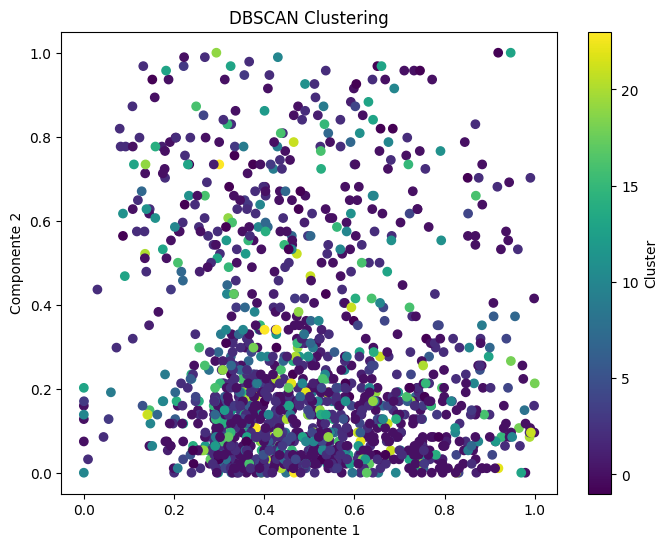

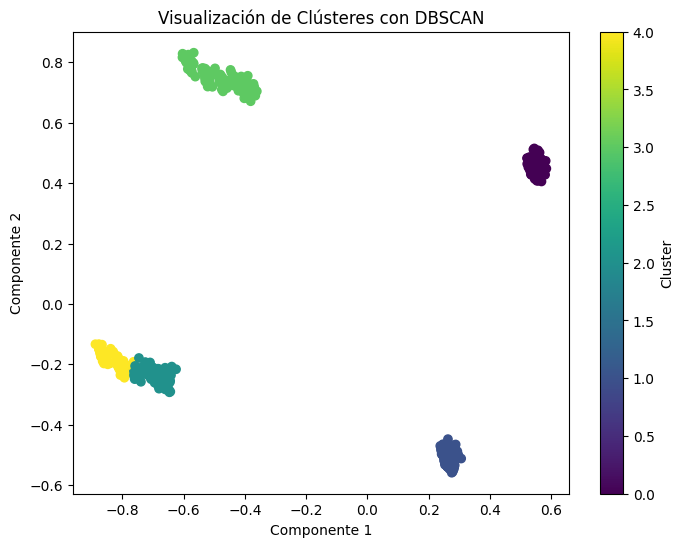

Índice de Silueta: 0.34411583548412644
Número de clústeres: 24


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Asegúrate de que df_scaled sea un array de NumPy (si no lo es)
# Si df_scaled es un DataFrame de pandas, convierte a un array de NumPy
df_scaled_array = X.values if isinstance(X, pd.DataFrame) else X

# Paso 1: Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)  # Parámetros típicos (ajustar según sea necesario)
dbscan.fit(df_scaled_array)  # Ajusta el modelo DBSCAN a los datos escalados

# Paso 2: Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Mostrar la cantidad de puntos en cada clúster
import pandas as pd
cluster_counts = pd.Series(labels).value_counts()
print("Conteo de los clústeres:\n", cluster_counts)

# Paso 3: Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
# Se colorean los puntos según el clúster al que pertenecen
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame con las componentes principales (pca_df)
# y las etiquetas de los clústeres en la columna 'Cluster'
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreando según los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Añadir una barra de color para mostrar los clústeres
plt.colorbar(label='Cluster')

# Título y etiquetas
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar gráfico
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, dbscan.labels_)
print("Índice de Silueta:", silhouette_avg)
import numpy as np
n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Número de clústeres:", n_clusters)




Esta combinacion genera demasiados cluster lo cual no necesariamente es malo a menos que tenga una metrica de calidad predictiva baja como lo es este caso, con un silhouette de 34%, procederemos a buscar otra combinacion, esta se habia escogido debido a que tenia menor puntos de ruido, pero no fue la mejor opcion

##**Modelo 3 DBSCAN***

Conteo de los clústeres:
  0    492
-1    399
 1    358
 2     63
 4     57
 3     52
Name: count, dtype: int64


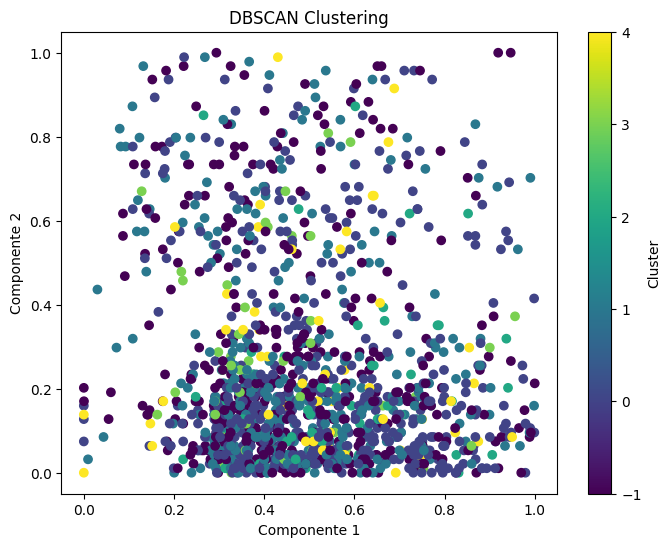

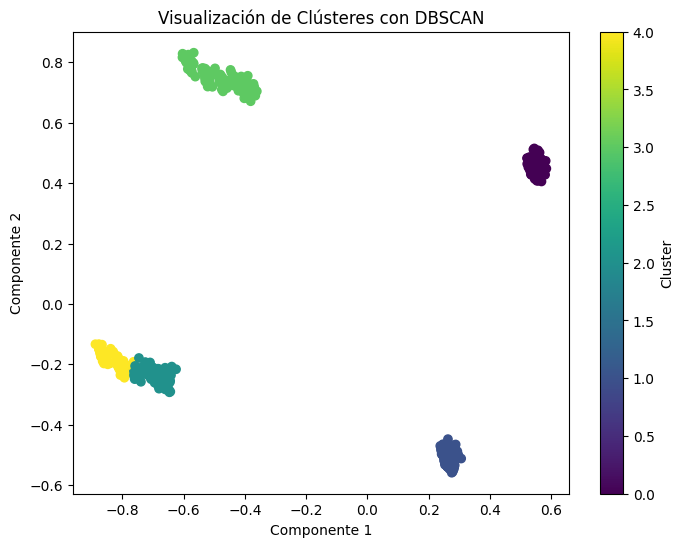

Índice de Silueta: 0.613985960337786
Número de clústeres: 5


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Asegúrate de que df_scaled sea un array de NumPy (si no lo es)
# Si df_scaled es un DataFrame de pandas, convierte a un array de NumPy
df_scaled_array = X.values if isinstance(X, pd.DataFrame) else X

# Paso 1: Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=50)  # Parámetros típicos (ajustar según sea necesario)
dbscan.fit(df_scaled_array)  # Ajusta el modelo DBSCAN a los datos escalados

# Paso 2: Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Mostrar la cantidad de puntos en cada clúster
import pandas as pd
cluster_counts = pd.Series(labels).value_counts()
print("Conteo de los clústeres:\n", cluster_counts)

# Paso 3: Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
# Se colorean los puntos según el clúster al que pertenecen
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame con las componentes principales (pca_df)
# y las etiquetas de los clústeres en la columna 'Cluster'
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreando según los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Añadir una barra de color para mostrar los clústeres
plt.colorbar(label='Cluster')

# Título y etiquetas
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar gráfico
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, dbscan.labels_)
print("Índice de Silueta:", silhouette_avg)
import numpy as np
n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Número de clústeres:", n_clusters)




Teniendo en cuenta que los parametros que variamos son: eps es la distancia maxima entre puntos de un cluster y min_samples es el minimo de puntos por cluster, al aumentar este minimo con respecto del primer dbscan a 50 y mantener el eps a 1.0 esta configuracion baja un cluster la cantidad y aumenta el indice silhouette, esto beneficioso para el modelo, probaremos otra combinacion, esto pouede deberse a que la forma de los cluster se ajuste con el estilo de dbscan

## **Modelo 4 DBSCAN**

Conteo de los clústeres:
 -1    571
 0    492
 1    358
Name: count, dtype: int64


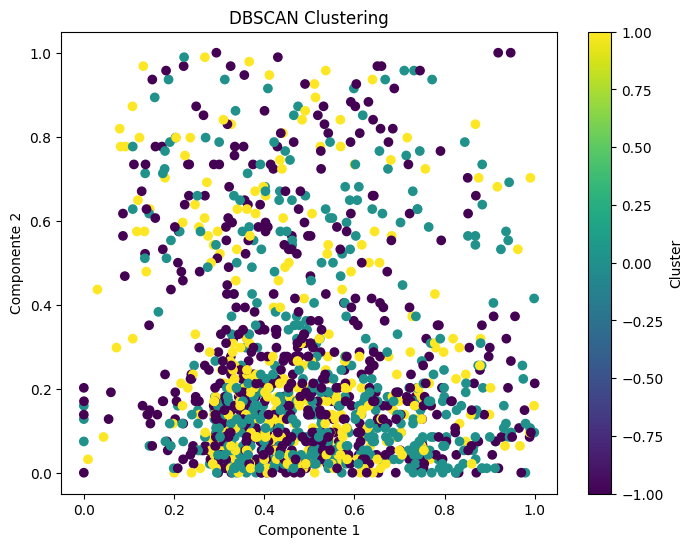

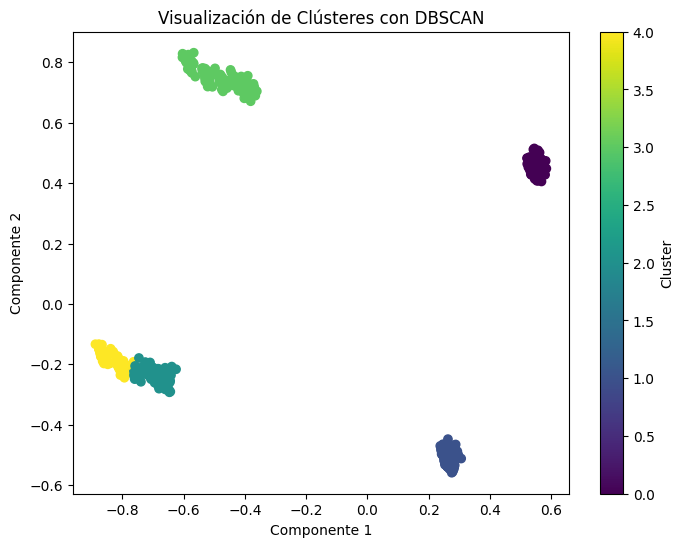

Índice de Silueta: 0.7223515890253143
Número de clústeres: 2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Asegúrate de que df_scaled sea un array de NumPy (si no lo es)
# Si df_scaled es un DataFrame de pandas, convierte a un array de NumPy
df_scaled_array = X.values if isinstance(X, pd.DataFrame) else X

# Paso 1: Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=70)  # Parámetros típicos (ajustar según sea necesario)
dbscan.fit(df_scaled_array)  # Ajusta el modelo DBSCAN a los datos escalados

# Paso 2: Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Mostrar la cantidad de puntos en cada clúster
import pandas as pd
cluster_counts = pd.Series(labels).value_counts()
print("Conteo de los clústeres:\n", cluster_counts)

# Paso 3: Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
# Se colorean los puntos según el clúster al que pertenecen
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame con las componentes principales (pca_df)
# y las etiquetas de los clústeres en la columna 'Cluster'
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreando según los clústeres
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Añadir una barra de color para mostrar los clústeres
plt.colorbar(label='Cluster')

# Título y etiquetas
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar gráfico
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, dbscan.labels_)
print("Índice de Silueta:", silhouette_avg)
import numpy as np
n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Número de clústeres:", n_clusters)




Este modelo es el que nos arroja el mejor resultado en relacion a metricas . Ajustando los siguientes parametros a 1.0 y 70 nos arroja una metrica de 72 porciento conformando dos clusters, sobre es numero no da mejoras en los resultados y sobre 100 se pasaria de los estandares de la industria y segun los mismos estandares de las combinaciones multiples con el codigo anterior

#**Modelo Escogido**

Kmeans

**MODELO 2 K-Means**

Centros de los clústeres:
 [[ 0.54512988  0.44930017]
 [ 0.26358573 -0.51195516]
 [-0.69875811 -0.23511776]
 [-0.48022399  0.74970113]
 [-0.83362139 -0.18371997]]

Inercia (SSE): 45.54859136664178
Coeficiente de Silhouette: 0.905713951129739

**Analisis**
El clustering ha sido exitoso, logrando una segmentación clara y efectiva. Los centros están bien distribuidos, la inercia es baja, lo que refleja clústeres compactos, y el coeficiente de Silhouette cercano a 1 confirma una separación óptima. Estos resultados indican que el modelo de clustering es adecuado y puede proporcionar información valiosa para el análisis  y la toma de decisiones relacionadas con los datos

# Evaluacion

**Centroides**
Los centroides de cada cluster después de aplicar el algoritmo K-Means. Cada fila corresponde a un cluster y cada columna muestra el valor medio de una variable climática específica para ese cluster. Aquí tienes un análisis básico basado en los centroides

Evaluacion

In [ ]:
# Supongamos que df es tu DataFrame original y kmeans es el modelo K-Means entrenado
# Definir los nuevos datos (deben tener las mismas características que los datos originales)
nuevos_datos = pd.DataFrame({
    'Temp_minima': [0.1, -0.2],
    'Temp_maxima': [0.5, -0.3],
    'Vel_viento3pm': [0.3, 0.7],
    'Humedad_3pm': [0.2, 0.4],
    'Temp3pm': [0.6, -0.1],
    'Nubes_9am': [0.4, 0.5]
})

# Estandarizar los datos nuevos usando el mismo scaler que para los datos de entrenamiento
scaler = StandardScaler()
X_scaled_nuevos_datos = scaler.fit_transform(nuevos_datos)

# Aplicar el modelo K-Means para predecir el cluster de los nuevos datos
clusters_nuevos_datos = kmeans.predict(X_scaled_nuevos_datos)

# Agregar las predicciones al DataFrame de nuevos datos
nuevos_datos['Cluster'] = clusters_nuevos_datos

# Mostrar los datos nuevos con sus respectivos clusters
nuevos_datos


Temp_minima  Temp_maxima  Vel_viento3pm  Humedad_3pm  Temp3pm  Nubes_9am  \
0          0.1          0.5            0.3          0.2      0.6        0.4   
1         -0.2         -0.3            0.7          0.4     -0.1        0.5   

   Cluster  
0        2  
1        0

Fila 0: La observación con valores 0.1 para Temp_minima, 0.5 para Temp_maxima, 0.3 para Vel_viento3pm, 0.2 para Humedad_3pm, 0.6 para Temp3pm, y 0.4 para Nubes_9am ha sido asignada al Cluster 2.

Fila 1: La observación con valores -0.2 para Temp_minima, -0.3 para Temp_maxima, 0.7 para Vel_viento3pm, 0.4 para Humedad_3pm, -0.1 para Temp3pm, y 0.5 para Nubes_9am ha sido asignada al Cluster 0.